In [1]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from sklearn.utils import shuffle
import warnings
warnings.simplefilter("ignore")

## Data Prepossessing

In [2]:
rush = pd.read_csv('Kaggle_train_processed_team.csv',index_col=0)
rush = rush[(rush['NflIdRusher']) == (rush['NflId'])]
rush

,Unnamed: 0.1,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,...,Def_Pass_IntR,Def_Pass_SkR,Def_Pass_Yds,Def_Pass_Y_G,Def_Pass_Y_A,Def_Rush_Att,Def_Rush_Yds,Def_Rush_Y_G,Def_Rush_Y_A,Def_Rush_TD
18,18,2017090700,20170907000118,True,41.25,30.53,3.63,3.35,0.38,198.02,...,B,A,D,D,C,C,C,C,D,C
40,40,2017090700,20170907000139,True,48.93,27.16,3.06,2.41,0.34,149.30,...,B,A,D,D,C,C,C,C,D,C
62,62,2017090700,20170907000189,True,71.34,19.11,5.77,2.42,0.60,219.18,...,B,A,D,D,C,C,C,C,D,C
84,84,2017090700,20170907000345,True,104.47,25.36,4.45,3.20,0.46,173.78,...,B,A,D,D,C,C,C,C,D,C
98,98,2017090700,20170907000395,False,29.99,27.12,3.90,2.53,0.44,34.27,...,B,C,C,C,B,A,B,B,D,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504707,509657,2018123015,20181230153910,False,70.43,32.27,3.99,3.38,0.39,72.56,...,C,B,C,C,C,A,B,B,D,A
504741,509691,2018123015,20181230154035,True,31.00,30.99,4.18,2.95,0.40,122.97,...,D,A,B,B,B,D,D,D,D,D
504763,509713,2018123015,20181230154082,True,39.93,29.20,4.67,3.68,0.45,63.11,...,D,A,B,B,B,D,D,D,D,D
504789,509739,2018123015,20181230154135,True,81.19,23.75,4.23,2.43,0.41,66.34,...,D,A,B,B,B,D,D,D,D,D


In [3]:
def convert_rank(grade):
    rank_d = {'A':4, 'B':3, 'C':2, 'D':1}
    return rank_d[grade]

rush = pd.concat([rush.iloc[:,:59], rush.iloc[:,59:].applymap(convert_rank)], axis=1)
rush

,Unnamed: 0.1,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,...,Def_Pass_IntR,Def_Pass_SkR,Def_Pass_Yds,Def_Pass_Y_G,Def_Pass_Y_A,Def_Rush_Att,Def_Rush_Yds,Def_Rush_Y_G,Def_Rush_Y_A,Def_Rush_TD
18,18,2017090700,20170907000118,True,41.25,30.53,3.63,3.35,0.38,198.02,...,3,4,1,1,2,2,2,2,1,2
40,40,2017090700,20170907000139,True,48.93,27.16,3.06,2.41,0.34,149.30,...,3,4,1,1,2,2,2,2,1,2
62,62,2017090700,20170907000189,True,71.34,19.11,5.77,2.42,0.60,219.18,...,3,4,1,1,2,2,2,2,1,2
84,84,2017090700,20170907000345,True,104.47,25.36,4.45,3.20,0.46,173.78,...,3,4,1,1,2,2,2,2,1,2
98,98,2017090700,20170907000395,False,29.99,27.12,3.90,2.53,0.44,34.27,...,3,2,2,2,3,4,3,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504707,509657,2018123015,20181230153910,False,70.43,32.27,3.99,3.38,0.39,72.56,...,2,3,2,2,2,4,3,3,1,4
504741,509691,2018123015,20181230154035,True,31.00,30.99,4.18,2.95,0.40,122.97,...,1,4,3,3,3,1,1,1,1,1
504763,509713,2018123015,20181230154082,True,39.93,29.20,4.67,3.68,0.45,63.11,...,1,4,3,3,3,1,1,1,1,1
504789,509739,2018123015,20181230154135,True,81.19,23.75,4.23,2.43,0.41,66.34,...,1,4,3,3,3,1,1,1,1,1


In [4]:
# clean offensive personnel
import json 

OffensePersonnel = rush['OffensePersonnel'].values
offense_list = ['RB','TE','WR','QB','OL']
inplace_list = ['DB','DL','LB']
target_list = ['WR','OL','OL']
new_list = []
for personnel in OffensePersonnel:
#     print(personnel)
    split = personnel.split(',')
#     print(split)
    dic = {}
    for piece in split:
        piece = piece.strip()
        if (piece[2:] or target_list[inplace_list.index(piece[2:])]) in dic.keys():
            dic[piece[2:]] += int(piece[0])
        else:
#             print(piece[0])
            if piece[2:] in offense_list:
                dic[piece[2:]] = int(piece[0])
            else:
                dic[target_list[inplace_list.index(piece[2:])]] = int(piece[0])
        
    if 'QB' not in dic.keys():
        dic['QB'] = 1    
    if 'OL' not in dic.keys() or sum(dic.values()) < 11:
        dic['OL'] = 11 - sum(dic.values())
        
    dic_sorted = sorted(dic.items(), key=lambda x: x[0])
    itemDict = {item[0]: item[1] for item in dic_sorted}
    new_list.append(json.dumps(itemDict))

# clean defensive personnel
DefensePersonnel = rush['DefensePersonnel'].values
defense_list = ['DB','DL','LB']
new_listd = []
for personnel in DefensePersonnel:
#     print(personnel)
    split = personnel.split(',')
#     print(split)
    dic = {}
    for piece in split:
        piece = piece.strip()
        if piece[2:] in dic.keys():
            dic[piece[2:]] += int(piece[0])
        else:
#             print(piece[0])
            if piece[2:] in defense_list:
                dic[piece[2:]] = int(piece[0])
            else:
                if 'DL' in dic.keys():
                    dic['DL'] += 1
                else:
                    dic['DL'] = int(piece[0])
        
#     dic_sorted = sorted(dic.items(), key=lambda x: x[0])
    new_listd.append(json.dumps(dic))

rush['OffensePersonnel'] = new_list
rush['DefensePersonnel'] = new_listd

In [5]:
rush = rush.assign(PossesionScoreBeforePlay = lambda x: np.where(x['HomePossesion'] == True,\
                                                                 x['HomeScoreBeforePlay'],\
                                                                 x['VisitorScoreBeforePlay']))
rush = rush.assign(DefensiveScoreBeforePlay = lambda x: np.where(x['HomePossesion'] == False,\
                                                                 x['HomeScoreBeforePlay'],\
                                                                 x['VisitorScoreBeforePlay']))

## Data Engineering

In [6]:
features = ['Team', 'X', 'Y', 'S', 'A', 'Dis',
       'Orientation', 'Dir', 'Season',
       'YardLine', 'Quarter', 'GameClock', 'Down',
       'Distance', 'PossesionScoreBeforePlay',
       'DefensiveScoreBeforePlay', 'DefendersInTheBox',
       'PlayDirection', 'PlayerHeight',
       'PlayerWeight','Week','StadiumType',
       'Turf', 'GameWeather','DefendersInTheBox_vs_Distance',
       'HomeField', 'PlayerBMI',
       'OffenseFormation','OffensePersonnel','DefensePersonnel','PlayerCollegeName','Position',
       'PlayDuration', 'PlayerAge', 'YardsLeft','Off_Pass_Cmp',
       'Off_Pass_Att', 'Off_Pass_CmpR', 'Off_Pass_TD', 'Off_Pass_IntR',
       'Off_Pass_SkR', 'Off_Pass_Yds', 'Off_Pass_Y_G', 'Off_Pass_Y_A',
       'Off_Pass_QBR', 'Off_Rush_Att', 'Off_Rush_Yds', 'Off_Rush_Y_G',
       'Off_Rush_Y_A', 'Off_Rush_TD', 'Def_Pass_Cmp', 'Def_Pass_Att',
       'Def_Pass_CmpR', 'Def_Pass_TD', 'Def_Pass_IntR', 'Def_Pass_SkR',
       'Def_Pass_Yds', 'Def_Pass_Y_G', 'Def_Pass_Y_A', 'Def_Rush_Att',
       'Def_Rush_Yds', 'Def_Rush_Y_G', 'Def_Rush_Y_A', 'Def_Rush_TD', 'Yards']

all_of = rush["OffenseFormation"].unique()
all_op = rush["OffensePersonnel"].unique()
all_di = rush["DefendersInTheBox"].unique()
all_dp = rush["DefensePersonnel"].unique()
all_cn = rush["PlayerCollegeName"].unique()
all_pos = rush["Position"].unique()
all_ht = rush["HomeTeamAbbr"].unique()
all_vt = rush["VisitorTeamAbbr"].unique()

In [7]:
rush.isna().any()[rush.isna().any() == True]

FieldPosition                    True
OffenseFormation                 True
DefendersInTheBox                True
StadiumType                      True
Temperature                      True
Humidity                         True
WindSpeed                        True
WindDirection                    True
DefendersInTheBox_vs_Distance    True
dtype: bool

In [8]:
rush['DefendersInTheBox_vs_Distance'].isna().sum()

3

In [9]:
np.random.seed(666)
rush_s = shuffle(rush)
rush_s = rush_s.dropna()
training_rush = rush_s[features][0:int(0.80*rush_s.shape[0])]
# validation_rush = rush_s[int(0.60*rush_s.shape[0]):int(0.80*rush_s.shape[0])]
testing_rush = rush_s[features][int(0.20*rush_s.shape[0]):]


In [10]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score
import category_encoders as ce

categorical_features = ['Season','OffenseFormation','OffensePersonnel','DefensePersonnel','PlayerCollegeName','Position']

X_train = training_rush.iloc[:,:-1]
X_test = testing_rush.iloc[:,:-1]
y_train = training_rush['Yards']
y_test = testing_rush['Yards']

Don't run the following block of code while testing, it takes a long time to choose the best way to do categorical variables encoding(we have comment it out already)

In [ ]:
# choose the best way to do categorical variables encoding
# !pip install category_encoders

# encoder_list = [ce.backward_difference.BackwardDifferenceEncoder, 
#                 ce.basen.BaseNEncoder,
#                 ce.binary.BinaryEncoder,
#                 ce.cat_boost.CatBoostEncoder,
#                 ce.hashing.HashingEncoder,
#                 ce.helmert.HelmertEncoder,
#                 ce.james_stein.JamesSteinEncoder,
#                 ce.one_hot.OneHotEncoder,
#                 ce.leave_one_out.LeaveOneOutEncoder,
#                 ce.m_estimate.MEstimateEncoder,
#                 ce.ordinal.OrdinalEncoder,
#                 ce.polynomial.PolynomialEncoder,
#                 ce.sum_coding.SumEncoder,
#                 ce.target_encoder.TargetEncoder,
#                 ce.woe.WOEEncoder
#                 ]

# for encoder in encoder_list:
#     try:
#         categorical_transformer = Pipeline(steps=[
#         ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#         ('woe', encoder())])

#         preprocessor = ColumnTransformer(
#         transformers=[('cat', categorical_transformer, categorical_features)])

#         pipe = Pipeline(steps=[('preprocessor', preprocessor),
#                           ('classifier', RandomForestClassifier(n_estimators=500))])

#         model = pipe.fit(X_train, y_train)

#         y_pred = model.predict(X_test)
#         print(encoder)
#         print(f1_score(y_test, y_pred, average='macro'))
#     except:
#         print(encoder)
#         print('this encoder cannot handle our data')

<class 'category_encoders.backward_difference.BackwardDifferenceEncoder'>
this encoder cannot handle our data


In [11]:
# BaseN encoding method gives the best score. We use this algorithm to encode the categorical variables within
# our dataset
encoder = ce.basen.BaseNEncoder(cols = categorical_features)
encoder.fit(X_train, y_train)
tree_train = encoder.transform(X_train)
tree_test = encoder.transform(X_test)

In [12]:
pd.options.display.max_columns= 200
tree_train

,Team,X,Y,S,A,Dis,Orientation,Dir,Season_0,Season_1,YardLine,Quarter,GameClock,Down,Distance,PossesionScoreBeforePlay,DefensiveScoreBeforePlay,DefendersInTheBox,PlayDirection,PlayerHeight,PlayerWeight,Week,StadiumType,Turf,GameWeather,DefendersInTheBox_vs_Distance,HomeField,PlayerBMI,OffenseFormation_0,OffenseFormation_1,OffenseFormation_2,OffenseFormation_3,OffensePersonnel_0,OffensePersonnel_1,OffensePersonnel_2,OffensePersonnel_3,OffensePersonnel_4,OffensePersonnel_5,OffensePersonnel_6,DefensePersonnel_0,DefensePersonnel_1,DefensePersonnel_2,DefensePersonnel_3,DefensePersonnel_4,DefensePersonnel_5,PlayerCollegeName_0,PlayerCollegeName_1,PlayerCollegeName_2,PlayerCollegeName_3,PlayerCollegeName_4,PlayerCollegeName_5,PlayerCollegeName_6,PlayerCollegeName_7,PlayerCollegeName_8,Position_0,Position_1,Position_2,Position_3,PlayDuration,PlayerAge,YardsLeft,Off_Pass_Cmp,Off_Pass_Att,Off_Pass_CmpR,Off_Pass_TD,Off_Pass_IntR,Off_Pass_SkR,Off_Pass_Yds,Off_Pass_Y_G,Off_Pass_Y_A,Off_Pass_QBR,Off_Rush_Att,Off_Rush_Yds,Off_Rush_Y_G,Off_Rush_Y_A,Off_Rush_TD,Def_Pass_Cmp,Def_Pass_Att,Def_Pass_CmpR,Def_Pass_TD,Def_Pass_IntR,Def_Pass_SkR,Def_Pass_Yds,Def_Pass_Y_G,Def_Pass_Y_A,Def_Rush_Att,Def_Rush_Yds,Def_Rush_Y_G,Def_Rush_Y_A,Def_Rush_TD
442989,True,51.21,25.76,4.89,3.04,0.49,64.82,61.98,0,1,46,3,341.0,1,10,23,2,7.0,True,75,247,14,1.0,True,1.0,0.700000,True,30.869511,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1.0,24.923045,54,1,1,3,1,2,1,1,1,3,3,3,3,3,2,2,4,4,3,4,2,3,4,4,4,2,3,3,2,2
470566,False,26.39,30.78,3.93,3.44,0.38,93.43,141.70,0,1,21,2,564.0,1,10,6,14,7.0,False,70,195,15,1.0,True,-1.0,0.700000,False,27.976531,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1.0,25.338580,79,1,1,3,3,3,1,1,1,4,4,4,4,4,4,2,3,3,3,1,1,3,2,2,2,2,3,3,3,3
296300,False,83.39,26.61,5.15,2.18,0.51,59.10,49.20,0,1,21,2,374.0,2,3,7,7,7.0,True,69,210,3,1.0,True,-0.5,2.333333,True,31.008192,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,2.0,29.694057,79,3,2,4,1,3,2,2,2,2,3,2,1,1,2,1,3,4,2,1,4,2,2,2,1,1,1,1,1,2
241801,True,63.44,26.90,4.64,3.72,0.44,193.56,135.49,1,0,42,1,429.0,3,5,0,0,6.0,False,70,220,16,1.0,True,-0.5,1.200000,False,31.563265,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2.0,23.148730,58,4,3,4,2,3,3,3,3,3,3,2,1,1,1,2,4,4,3,1,3,1,2,2,1,1,1,1,1,2
149531,True,27.57,31.02,3.79,2.81,0.39,151.76,45.74,1,0,22,4,595.0,1,10,17,24,7.0,False,72,224,11,1.0,True,-0.5,0.700000,True,30.376543,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1.0,23.049574,22,2,2,3,2,2,3,2,2,2,3,3,2,2,1,2,4,4,3,2,1,4,3,3,1,3,3,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90209,False,41.11,25.38,2.90,2.20,0.48,359.87,75.61,1,0,35,2,552.0,1,10,10,0,7.0,True,72,210,6,1.0,True,1.0,0.700000,False,28.478009,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1.0,23.041914,35,3,3,3,2,3,2,3,3,3,3,1,2,2,3,2,3,3,3,2,3,4,2,2,2,2,2,2,2,3
73291,False,44.31,19.33,5.59,2.82,0.56,14.40,170.81,1,0,40,3,842.0,1,10,24,10,7.0,True,70,208,5,1.0,True,2.0,0.700000,False,29.841633,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1.0,23.120886,40,2,2,2,1,3,3,2,2,2,2,4,4,4,3,3,4,4,3,1,3,1,2,2,1,1,1,1,1,2
98522,False,30.51,27.96,3.89,2.30,0.46,11.31,93.34,1,0,25,2,289.0,2,10,0,13,7.0,True,73,220,7,1.0,True,-2.0,0.700000,False,29.022331,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,1.0,32.590724,25,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,3,3,3,1,4,3,2,2,2,3,2,2,1,3
223441,False,51.69,30.64,3.46,2.60,0.44,350.27,64.86,1,0,46,1,122.0,3,1,0,6,8.0,True,75,247,15,1.0,True,2.0,8.000000,False,30.869511,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1.0,23.953220,46,1,1,3,1,2,1,1,1,3,3,3,3,3,2,2,3,3

In [14]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(tree_train)
tree_train_s= scaler.transform(tree_train)
tree_test_s= scaler.transform(tree_test)

## Linear Regression

In [15]:
tree_train_linear = pd.concat([tree_train,y_train], axis=1)

candidate_variables=tree_train.columns
full=len(candidate_variables)
best_model='Yards~'
BEST_RMSE=np.inf

actual=testing_rush['Yards'].values
# y_train = training_rush['Yards']
# y_test = testing_rush['Yards']
curr = 0
for i in np.arange(full-1,-1,-1):
    RMSE=np.empty(i+1)
    for j in range(i+1):
        if curr != 0:
            candidate_formula=best_model+"+"+candidate_variables[j]
        else:
            candidate_formula=best_model+candidate_variables[j]
        print(candidate_formula)
        prediction=ols(formula=candidate_formula,data=tree_train_linear).fit().predict(tree_test)
        RMSE[j]=np.sqrt(((prediction-actual)**2).mean())
        print(RMSE[j])
    print(RMSE)
    if BEST_RMSE>np.min(RMSE):
        Add_i=np.where(RMSE==np.min(RMSE))[0][0]
        best_model=best_model+"+"+candidate_variables[Add_i]
        curr += 1
        print("variable added:", candidate_variables[Add_i])
        BEST_RMSE=np.min(RMSE)
        candidate_variables=np.delete(candidate_variables,Add_i)    
    else:
        break
best_model    

Yards~Team
5.602130064424624
Yards~X
5.590298080606021
Yards~Y
5.601658703816207
Yards~S
5.5779544198182505
Yards~A
5.530460196015607
Yards~Dis
5.593758950709762
Yards~Orientation
5.60196070134285
Yards~Dir
5.601972588135401
Yards~Season_0
5.597694654513635
Yards~Season_1
5.597694654513635
Yards~YardLine
5.5808092040707455
Yards~Quarter
5.601735349617234
Yards~GameClock
5.599844151039657
Yards~Down
5.600773468861881
Yards~Distance
5.588033176290395
Yards~PossesionScoreBeforePlay
5.601931811449278
Yards~DefensiveScoreBeforePlay
5.6021018946148455
Yards~DefendersInTheBox
5.559630816118269
Yards~PlayDirection
5.601960453408483
Yards~PlayerHeight
5.601119111183051
Yards~PlayerWeight
5.5965414032543075
Yards~Week
5.601929251732697
Yards~StadiumType
5.601726948071261
Yards~Turf
5.602267108910033
Yards~GameWeather
5.601854233580103
Yards~DefendersInTheBox_vs_Distance
5.580654747911217
Yards~HomeField
5.60198084145026
Yards~PlayerBMI
5.599083048229398
Yards~OffenseFormation_0
5.602006597217120

5.484005524998329
Yards~+A+DefendersInTheBox+Quarter
5.497075850013608
Yards~+A+DefendersInTheBox+GameClock
5.495354702607509
Yards~+A+DefendersInTheBox+Down
5.495885700912886
Yards~+A+DefendersInTheBox+Distance
5.491762649481544
Yards~+A+DefendersInTheBox+PossesionScoreBeforePlay
5.496886023268014
Yards~+A+DefendersInTheBox+DefensiveScoreBeforePlay
5.497048136747591
Yards~+A+DefendersInTheBox+PlayDirection
5.496988943165321
Yards~+A+DefendersInTheBox+PlayerHeight
5.497113562644563
Yards~+A+DefendersInTheBox+PlayerWeight
5.4952375348793145
Yards~+A+DefendersInTheBox+Week
5.497025249238377
Yards~+A+DefendersInTheBox+StadiumType
5.496822721162134
Yards~+A+DefendersInTheBox+Turf
5.4974614899676375
Yards~+A+DefendersInTheBox+GameWeather
5.497077775398584
Yards~+A+DefendersInTheBox+DefendersInTheBox_vs_Distance
5.491444819165684
Yards~+A+DefendersInTheBox+HomeField
5.4970621507622575
Yards~+A+DefendersInTheBox+PlayerBMI
5.495759350786491
Yards~+A+DefendersInTheBox+OffenseFormation_0
5.49707

5.467446717157111
Yards~+A+DefendersInTheBox+S+PlayerCollegeName_0
5.4670588320128
Yards~+A+DefendersInTheBox+S+PlayerCollegeName_1
5.466824984549935
Yards~+A+DefendersInTheBox+S+PlayerCollegeName_2
5.4669985717361085
Yards~+A+DefendersInTheBox+S+PlayerCollegeName_3
5.467013550562009
Yards~+A+DefendersInTheBox+S+PlayerCollegeName_4
5.466674737338724
Yards~+A+DefendersInTheBox+S+PlayerCollegeName_5
5.466723473806198
Yards~+A+DefendersInTheBox+S+PlayerCollegeName_6
5.466188639503147
Yards~+A+DefendersInTheBox+S+PlayerCollegeName_7
5.467515637340781
Yards~+A+DefendersInTheBox+S+PlayerCollegeName_8
5.467151353585389
Yards~+A+DefendersInTheBox+S+Position_0
5.467048040862541
Yards~+A+DefendersInTheBox+S+Position_1
5.46696140758498
Yards~+A+DefendersInTheBox+S+Position_2
5.465709266081891
Yards~+A+DefendersInTheBox+S+Position_3
5.465631700806921
Yards~+A+DefendersInTheBox+S+PlayDuration
5.466351802916724
Yards~+A+DefendersInTheBox+S+PlayerAge
5.467055536330075
Yards~+A+DefendersInTheBox+S+Yar

5.455288934049181
Yards~+A+DefendersInTheBox+S+YardLine+Off_Pass_QBR
5.455243544295681
Yards~+A+DefendersInTheBox+S+YardLine+Off_Rush_Att
5.455490907247129
Yards~+A+DefendersInTheBox+S+YardLine+Off_Rush_Yds
5.454694128887964
Yards~+A+DefendersInTheBox+S+YardLine+Off_Rush_Y_G
5.454694128887964
Yards~+A+DefendersInTheBox+S+YardLine+Off_Rush_Y_A
5.453505522799711
Yards~+A+DefendersInTheBox+S+YardLine+Off_Rush_TD
5.451080258462604
Yards~+A+DefendersInTheBox+S+YardLine+Def_Pass_Cmp
5.455525792130834
Yards~+A+DefendersInTheBox+S+YardLine+Def_Pass_Att
5.454896051675584
Yards~+A+DefendersInTheBox+S+YardLine+Def_Pass_CmpR
5.455578422825497
Yards~+A+DefendersInTheBox+S+YardLine+Def_Pass_TD
5.452837581707709
Yards~+A+DefendersInTheBox+S+YardLine+Def_Pass_IntR
5.455217346796354
Yards~+A+DefendersInTheBox+S+YardLine+Def_Pass_SkR
5.4545616162221995
Yards~+A+DefendersInTheBox+S+YardLine+Def_Pass_Yds
5.4554515013750065
Yards~+A+DefendersInTheBox+S+YardLine+Def_Pass_Y_G
5.4554515013750065
Yards~+A+Defe

5.450968301924919
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Def_Pass_Y_A
5.449980289331314
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Def_Rush_Att
5.449342546074841
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Def_Rush_Yds
5.447613597460201
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Def_Rush_Y_G
5.447613597460201
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Def_Rush_Y_A
5.4476098659057035
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Def_Rush_TD
5.450403099096003
[5.45114531 5.44849303 5.45086291 5.45109907 5.45064928 5.45088839
 5.45044405 5.45044405 5.45098653 5.45032689 5.45102411 5.45094782
 5.45108999 5.45086226 5.45127127 5.45121584 5.45095927 5.45083093
 5.45141814 5.4511032  5.45090684 5.45097559 5.45100386 5.45103798
 5.45112556 5.45114947 5.45073015 5.45103798 5.45057558 5.45059698
 5.45109689 5.44996941 5.45093627 5.45108842 5.45100848 5.45051153
 5.45064118 5.45099817 5.4507793  5.45117263 5.45103798 5.45079193
 5.45094015 5.45091893 5.45057699 5.45053849 

5.446175493140005
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Pass_Y_G
5.446175493140005
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Pass_Y_A
5.44538685945133
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Att
5.444953840782572
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Yds
5.443196694128581
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_G
5.443196694128581
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A
5.442906516317625
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_TD
5.445843672060472
[5.44618368 5.44333081 5.44603106 5.44628866 5.44584792 5.44607649
 5.44572016 5.44572016 5.44621711 5.44549151 5.44621824 5.4462395
 5.44631176 5.44605567 5.44655368 5.44631548 5.44612723 5.44560206
 5.44662971 5.44630197 5.44610712 5.446171   5.44601306 5.44623906
 5.44626847 5.44637477 5.44577656 5.44623906 5.44572402 5.44573145
 5.44629964 5.445295

5.4433567641289065
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+Off_Pass_QBR
5.443000091565456
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+Off_Rush_Att
5.442132865205915
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+Off_Rush_Yds
5.442708005459158
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+Off_Rush_Y_G
5.442708005459158
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+Off_Rush_Y_A
5.442649898894629
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+Def_Pass_Cmp
5.442795911455074
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+Def_Pass_Att
5.442632711614748
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+Def_Pass_CmpR
5.443079434547733
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+Def_Pass_TD
5.442292610383937
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rus

5.438520291274944
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+Position_3
5.438608654183965
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+PlayDuration
5.439611567067226
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+PlayerAge
5.439978260325748
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft
5.438379235459431
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+Off_Pass_Cmp
5.4393394342526955
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+Off_Pass_Att
5.439344202645678
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+Off_Pass_CmpR
5.439966020898528
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+Off_Pass_TD
5.4400009899639565
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+Off_Pass_IntR
5.439722342962547
Yards~+A+DefendersInTheBox+S+YardLine+Dist

5.43827484203597
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+DefensePersonnel_5
5.437964221278315
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+PlayerCollegeName_0
5.43837923545943
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+PlayerCollegeName_1
5.438157313652291
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+PlayerCollegeName_2
5.438385695793879
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+PlayerCollegeName_3
5.4383339976681535
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+PlayerCollegeName_4
5.438202388233934
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+PlayerCollegeName_5
5.438123545003541
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+PlayerCollegeName_6
5.4381332293826095
Yards~+

5.437019727505311
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffenseFormation_0
5.436984857328088
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffenseFormation_1
5.437049852661078
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffenseFormation_2
5.437139011644149
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffenseFormation_3
5.436484185263873
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_0
5.436984857328088
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_1
5.43646230864832
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_2
5.436692188900171
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+

5.435679203224595
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Dis
5.435927395103111
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Orientation
5.435540736107606
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Dir
5.435238780847658
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Season_0
5.435295853527181
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Season_1
5.435295853527181
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Quarter
5.435828876952231
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+GameClock
5.435279117212866
Ya

5.435310158618158
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Off_Pass_Y_G
5.435310158618158
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Off_Pass_Y_A
5.436345986319134
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Off_Pass_QBR
5.435969936997793
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Off_Rush_Att
5.435579148292817
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Off_Rush_Yds
5.435736106538254
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Off_Rush_Y_G
5.435736106538254
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_

5.43511543494168
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+OffensePersonnel_6
5.435124225335903
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+DefensePersonnel_0
5.435114179257027
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+DefensePersonnel_1
5.434825140543318
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+DefensePersonnel_2
5.434724533771124
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+DefensePersonnel_3
5.434950145352936
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+DefensePersonnel_4
5.435149931079474
Yards

5.434622640922399
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Y
5.434445219523666
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Dis
5.434555817275595
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Orientation
5.434241427147507
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Season_0
5.433936687008866
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Season_1
5.433936687008865
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Quarter
5.434457225850023
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off

5.4345227548307
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Off_Pass_TD
5.434607372875283
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Off_Pass_IntR
5.434452623549338
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Off_Pass_SkR
5.434487762608468
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Off_Pass_Yds
5.433974678845609
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Off_Pass_Y_G
5.433974678845609
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Off_Pass_Y_A
5.43495804397615
Yards~+A+DefendersI

5.433809334168555
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+OffenseFormation_1
5.433838346678903
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+OffenseFormation_2
5.433915314434017
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+OffenseFormation_3
5.4335294227098325
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+OffensePersonnel_0
5.433809334168555
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+OffensePersonnel_1
5.433257393489917
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Positio

5.4333870120142045
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+Def_Pass_Y_A
5.433615756060031
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+Def_Rush_Att
5.4336526082745475
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+Def_Rush_Yds
5.433661271976013
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+Def_Rush_Y_G
5.433661271976013
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+Def_Rush_TD
5.433992221989694
[5.4339622  5.43380866 5.43385851 5.43361106 5.43325951 5.43325951
 5.43375506 5.43322095 5.43387952 5.43379414 5.4338339

5.433220954099532
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+PlayerCollegeName_1
5.433102280814898
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+PlayerCollegeName_2
5.433084359868202
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+PlayerCollegeName_3
5.433057706667949
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+PlayerCollegeName_4
5.433088775591419
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+PlayerCollegeName_5
5.432932814533731
Yards~+A+DefendersInTheBox+S+YardLine

5.432447981116182
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0
5.432108161065476
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_1
5.432108161065477
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Quarter
5.432583182599001
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Down
5.432689182881413
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+PossesionScoreBeforePlay
5.4326505889130745
Yards~+A+Defend

5.432277096704735
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+PlayerAge
5.432767553828518
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Off_Pass_Cmp
5.432727937058236
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Off_Pass_CmpR
5.432733584694399
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Off_Pass_TD
5.432819791136064
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Off_Pass_IntR
5.432613692866633
Yards~+A+

5.432046209934146
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+StadiumType
5.432013453678719
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+Turf
5.432517534782874
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+GameWeather
5.432189313844595
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefendersInTheBox_vs_Distance
5.4320246820809235
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pas

5.432056660701216
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+Off_Pass_Yds
5.432491009719835
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+Off_Pass_Y_G
5.432491009719835
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+Off_Pass_Y_A
5.432581859358803
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+Off_Pass_QBR
5.432222952969676
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Se

5.43201997416874
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+GameWeather
5.43168967575551
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+DefendersInTheBox_vs_Distance
5.431462868470274
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+HomeField
5.4315604006538365
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+PlayerBMI
5.431709496813427
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLe

5.431552479365187
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Off_Pass_Yds
5.432020249056361
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Off_Pass_Y_G
5.432020249056361
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Off_Pass_Y_A
5.432094843469074
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Off_Pass_QBR
5.431737903604283
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Positi

5.431477396002453
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+GameWeather
5.431121963977089
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+DefendersInTheBox_vs_Distance
5.430919658677823
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+HomeField
5.431014134140995
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+PlayerBMI
5.431160552431778
Yards~+A+DefendersInTheBox+S

5.431046436321648
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+Off_Pass_SkR
5.430987915701719
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+Off_Pass_Yds
5.431511644880728
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+Off_Pass_Y_G
5.431511644880728
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+Off_Pass_Y_A
5.431600141559357
Yards~+A+DefendersInTheBox+S+YardLine+

5.431079340543076
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+Week
5.430484635384779
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+StadiumType
5.4305268367133595
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+Turf
5.430939483898993
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+GameWeath

5.430530343676231
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+PlayDuration
5.43016344434434
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+PlayerAge
5.430643614929491
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+Off_Pass_Cmp
5.430623211980146
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel

5.429879793513728
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+Season_1
5.429882688336561
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+Quarter
5.429846731372452
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+Down
5.429960719396615
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+Defe

5.429756379380671
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+PlayerCollegeName_2
5.429783912101954
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+PlayerCollegeName_3
5.429619050686307
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+PlayerCollegeName_4
5.429731808322654
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_

5.429882688336561
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+Def_Pass_Y_A
5.429882385964488
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+Def_Rush_Att
5.429751396535158
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+Def_Rush_Yds
5.429731040625677
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_

5.42936344321417
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+OffenseFormation_2
5.429352989820759
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+OffensePersonnel_0
5.429311364183236
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+OffensePersonnel_3
5.429421846737192
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Po

5.429792913593777
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+Off_Pass_Y_G
5.429792913593777
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+Off_Pass_Y_A
5.429862184578214
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+Off_Pass_QBR
5.429486848090584
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffenseP

5.428804344492878
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+DefensiveScoreBeforePlay
5.428866241457409
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+PlayDirection
5.4286080105639725
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+PlayerHeight
5.429121107108112
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off

5.428642872497846
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+PlayerCollegeName_5
5.428481797590741
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+PlayerCollegeName_6
5.428679552796692
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+PlayerCollegeName_7
5.4292706150031895
Yards~+A+DefendersInTheBox+S+YardLine+Dist

5.4288027901140135
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Def_Rush_Att
5.428659058011024
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Def_Rush_Yds
5.4286371516647565
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Def_Rush_Y_G
5.4286371516647565
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+De

5.4284830266493245
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+OffenseFormation_2
5.428482859674634
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+OffensePersonnel_0
5.428438862803544
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+OffensePersonnel_3
5.42854718184848
Yards~+A+DefendersInTheBox+S+YardL

5.428898473140547
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+Off_Pass_Y_G
5.428898473140547
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+Off_Pass_Y_A
5.4289737319087354
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+Off_Pass_QBR
5.428607772534945
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_

5.4281936734314495
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PossesionScoreBeforePlay
5.4281085948796015
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+DefensiveScoreBeforePlay
5.428179692560619
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName

5.428010247633101
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_2
5.428024561719204
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3
5.427907853853475
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCol

5.427915880217274
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+Def_Pass_SkR
5.428094938282555
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+Def_Pass_Y_G
5.428113330706043
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+Def_Pass_Y_A
5.42810934

5.427938878001065
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+DefendersInTheBox_vs_Distance
5.427870423762858
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+HomeField
5.427858504012057
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDu

5.427919581520354
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+PlayerAge
5.427989471087228
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Off_Pass_Cmp
5.42785834075549
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerC

5.42775703439954
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Rush_TD
5.427949665006972
[5.42800562 5.42790466 5.42791049 5.42790785 5.42786515 5.42799029
 5.42790697 5.42798523 5.42772448 5.42827294 5.42859906 5.42788143
 5.42792791 5.42829457 5.42793888 5.42787042 5.4278585  5.4280255
 5.42790785 5.42796471 5.42795443 5.42790785 5.42800409 5.42792094
 5.42790239 5.42788819 5.42775559 5.42778013 5.42793349 5.4280028
 5.42790785 5.4278119  5.42776691 5.42782234 5.42784147 5.42837385
 5.42796116 5.4278779  5.42791958 5.42798947 5.42785834 5.42801249
 5.42808387 5.42781274 5.42776718 5.42837377 5.42837377 5.42836107
 5.42803614 5.42786312 5.42787613 5.42787613 5.42774259 5.42773746
 5.42806918 5.42806384 5.4277041 

5.427774987740834
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+OffensePersonnel_0
5.42770410291551
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+OffensePersonnel_3
5.427808713206412
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+

5.427546064166867
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Pass_Yds
5.4280854215423044
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Pass_Y_G
5.4280854215423044
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePe

5.427505863994822
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+Quarter
5.427461226442161
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+Down
5.42758290160974
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3

5.427486482336156
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+DefensePersonnel_1
5.4273450981124585
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+DefensePersonnel_3
5.427368336867789
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePer

5.427919272743695
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+Off_Pass_QBR
5.427611515105764
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+Off_Rush_Att
5.427535117289744
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+Offe

5.427405431657211
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+PossesionScoreBeforePlay
5.427328008353735
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+DefensiveScoreBeforePlay
5.4274019886857
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+Defen

5.427356260280601
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+DefensePersonnel_5
5.427423464762009
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+PlayerCollegeName_0
5.4273281329071
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel

5.427348341371437
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Off_Rush_Y_G
5.427348341371437
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Pass_Cmp
5.42718040187334
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_

5.427508995527329
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+PlayerWeight
5.427859352255207
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Week
5.427138069602065
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePe

5.427168951194834
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+PlayerCollegeName_1
5.427070142324447
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+PlayerCollegeName_2
5.427028895880165
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_

5.4271892192148234
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp
5.426929246730886
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Att
5.427370943899844
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+

5.427627446161549
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+Week
5.426893947508497
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+StadiumType
5.427010289034838
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pa

5.426929246730886
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_1
5.426831051539733
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2
5.426784325007572
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Posi

5.42694605242724
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+Off_Rush_Y_G
5.42694605242724
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+Def_Pass_Att
5.426955920007062
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock

5.427094376502081
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+PlayerWeight
5.427475639382274
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+Week
5.42674306375137
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def

5.426886896289467
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+PlayerCollegeName_0
5.426784325007572
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+PlayerCollegeName_1
5.426694816201564
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2

5.42680055141783
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+Off_Rush_Y_G
5.42680055141783
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+Def_Pass_Att
5.426821756925479
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonne

5.426971869470248
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+PlayerWeight
5.427359330200662
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+Week
5.426619276732082
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+Yard

5.426694586416672
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_5
5.42673442207411
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+PlayerCollegeName_0
5.426662844238065
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD

5.427040751064381
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+Off_Pass_QBR
5.426787818892869
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+Off_Rush_Att
5.42669437585955
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A

5.426510055865446
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+Down
5.426621886856983
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PossesionScoreBeforePlay
5.426546381897538
Yards~+A+DefendersInTheBox+S

5.426560524383129
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+OffensePersonnel_6
5.426600685018039
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+DefensePersonnel_0
5.426527819040927
Yards~+A+DefendersIn

5.426885838099113
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+Off_Pass_Y_G
5.426885838099113
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+Off_Pass_Y_A
5.426926182704962
Yards~+A+DefendersInTheBox+S+Yar

5.426461689264084
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+Orientation
5.426457565863446
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+Season_1
5.4264608525299

5.426508822953451
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+OffenseFormation_2
5.426580130594883
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+OffensePersonnel_

5.426455521779254
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+Off_Pass_CmpR
5.426565496134657
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+Off_Pass_TD
5.42653477

5.4265297725658
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+Def_Rush_Y_G
5.4265297725658
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+Def_Rush_TD
5.4268369776294

5.426444823686189
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+DefendersInTheBox_vs_Distance
5.426381969183138
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+Player

5.426972712014216
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+PlayerCollegeName_8
5.426365978336495
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeNam

5.426439113417948
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Def_Pass_CmpR
5.426635991563793
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+Pl

5.426419425028142
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+PlayerHeight
5.426661696339075
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerColl

5.426375579221416
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+DefensePersonnel_0
5.426316243241665
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+Play

5.426639788849141
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_Y_A
5.42663216209451
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerColle

5.426239168475071
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Orientation
5.426239407310696
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_

5.426242698910093
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+OffenseFormation_1
5.426286939173418
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePer

5.426257329770382
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+PlayerAge
5.42630672917735
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+P

5.42624305242433
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Def_Rush_Yds
5.42631261243299
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3

5.426254205779747
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+Turf
5.426478036479591
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel

5.426408848410816
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PlayerCollegeName_0
5.426199398705356
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+D

5.426282169615795
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+Off_Rush_Yds
5.426199908978739
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefenseP

5.426122611222039
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+Down
5.426198268959586
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePer

5.426122611222045
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+OffensePersonnel_3
5.426231092097992
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeNam

5.426121129018846
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+Off_Pass_IntR
5.426107695311422
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+D

5.426189063586026
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+Def_Rush_TD
5.426445765941329
[5.42628697 5.42612443 5.42612189 5.42612261 5.42619827 5.42632014
 5.42644519 5.42694061 5.42608765 5.42618077 5.42638946 5.42616341
 5.42609806 5.42608001 5.42628499 5.42612261 5.42616433 5.42620958
 5.42612261 5.42623109 5.42613594 5.42615026 5.42610429 5.42608314
 5.42634916 5.42612261 5.42609301 5.42673622 5.42609478 5.42608722
 5.42613911 5.42617919 5.42614395 5.42612113 5.4261077  5.42625442
 5.4262

5.4260557062688655
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+PlayerBMI
5.42624171461113
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeNa

5.426693399088014
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+PlayerCollegeName_8
5.426051205731769
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+Playe

5.426149981217108
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+Def_Pass_CmpR
5.426333282175518
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerColle

5.426218075611506
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+PlayerHeight
5.426360451831808
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pa

5.4260439934288405
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6
5.425991162011637
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att

5.426194440155812
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+Off_Pass_Y_G
5.426194440155812
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pa

5.426356492273288
[5.42624321 5.42603919 5.42603564 5.42603725 5.4261151  5.42621808
 5.42636045 5.42685007 5.42600934 5.42609333 5.42630106 5.42607664
 5.42600675 5.42619544 5.42603725 5.4260815  5.42605305 5.42603725
 5.42614255 5.42604399 5.42599116 5.42601991 5.42626631 5.42603725
 5.4260055  5.42665527 5.42600974 5.42600143 5.42605078 5.42609788
 5.42606035 5.426036   5.42602801 5.42619444 5.42619444 5.42636802
 5.42609074 5.42612253 5.42603688 5.42603688 5.42611455 5.42629427
 5.42603355 5.42603725 5.4260382  5.42610043 5.42610043 5.42635649]
variable added: OffensePersonnel_6
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+Defe

5.425962579401695
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerBMI
5.426159778450215
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def

5.4259572892545025
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+Position_1
5.426003613752644
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+D

5.4262539018042935
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+Def_Pass_SkR
5.425988293404182
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection

5.426287544843214
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+PlayerWeight
5.4267841704405235
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Ru

5.425959635568981
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+DefensePersonnel_0
5.4259338675643045
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+

5.426125706396293
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Off_Pass_Y_A
5.426280354234811
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rus

5.426253928300968
[5.42615131 5.42595091 5.42595034 5.4259522  5.42602693 5.42610977
 5.42628754 5.42678417 5.42592122 5.42602006 5.42619504 5.42599308
 5.42592301 5.4261086  5.4259522  5.42599539 5.42597397 5.4259522
 5.42603271 5.42595964 5.42593387 5.42609636 5.4259522  5.42654754
 5.42593053 5.42591725 5.42595241 5.42603808 5.42598627 5.42596377
 5.42593179 5.42612571 5.42612571 5.42628035 5.42601111 5.42603331
 5.4259483  5.4259483  5.4260256  5.42621841 5.42594798 5.4259522
 5.42595371 5.42602185 5.42602185 5.42625393]
variable added: Position_0
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_

5.4259583729334375
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance
5.425887031632368
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerColleg

5.42589389847332
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+Position_1
5.425915633282363
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR

5.42599140475101
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+Def_Pass_CmpR
5.4261832590888455
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_

5.425958207457227
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+DefensiveScoreBeforePlay
5.4260484572291485
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerC

5.425887031632368
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+OffensePersonnel_3
5.425967634912941
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeN

5.425866975909421
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+Off_Pass_Yds
5.426058385424577
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+

5.425888511780665
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+Def_Rush_Yds
5.425957124014175
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+

5.425922011694616
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+Week+Turf
5.426103693951495
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+Pla

5.425857747143057
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+Week+PlayerCollegeName_7
5.4264548042737415
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerC

5.425939160494393
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+Week+Off_Rush_Yds
5.4258544023415185
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeN

5.425832687163718
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+Week+PlayerCollegeName_8+Orientation
5.4258319056095266
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration

5.425873505246487
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+Week+PlayerCollegeName_8+OffenseFormation_2
5.425851304463002
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDu

5.425846033973821
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+Week+PlayerCollegeName_8+Off_Pass_IntR
5.4258308134533495
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDurati

5.425834880158736
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+Week+PlayerCollegeName_8+Def_Pass_Y_A
5.425836262545229
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration

5.426188413644157
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+Week+PlayerCollegeName_8+DefensePersonnel_0+PlayerWeight
5.42674865401392
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePerson

5.425951427253496
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+Week+PlayerCollegeName_8+DefensePersonnel_0+PlayerCollegeName_0
5.425815511894121
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+Offen

5.425894744038114
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+Week+PlayerCollegeName_8+DefensePersonnel_0+Off_Rush_Yds
5.425810787208508
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePerso

5.426001965126062
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+Week+PlayerCollegeName_8+DefensePersonnel_0+Position_1+Y
5.425799302574703
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePerso

5.425803081432613
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+Week+PlayerCollegeName_8+DefensePersonnel_0+Position_1+OffenseFormation_1
5.425839120625396
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormati

5.425798773044145
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+Week+PlayerCollegeName_8+DefensePersonnel_0+Position_1+Off_Pass_Yds
5.426051214113862
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+O

5.425804780202475
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+Week+PlayerCollegeName_8+DefensePersonnel_0+Position_1+Def_Rush_Yds
5.425872597983984
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+O

5.426677729757559
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+Week+PlayerCollegeName_8+DefensePersonnel_0+Position_1+Def_Pass_SkR+StadiumType
5.425863518836488
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseF

5.425915227621845
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+Week+PlayerCollegeName_8+DefensePersonnel_0+Position_1+Def_Pass_SkR+PlayerCollegeName_0
5.42579826653947
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+O

5.4258793401538625
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+Week+PlayerCollegeName_8+DefensePersonnel_0+Position_1+Def_Pass_SkR+Off_Rush_Yds
5.425793950914697
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+Offens

5.425789807472979
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+Week+PlayerCollegeName_8+DefensePersonnel_0+Position_1+Def_Pass_SkR+Off_Rush_Yds+Orientation
5.425792776833422
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonn

5.425793950914698
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+Week+PlayerCollegeName_8+DefensePersonnel_0+Position_1+Def_Pass_SkR+Off_Rush_Yds+OffenseFormation_1
5.425831029937598
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+Offense

5.4258024033705805
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+Week+PlayerCollegeName_8+DefensePersonnel_0+Position_1+Def_Pass_SkR+Off_Rush_Yds+Off_Pass_IntR
5.425784013894795
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePers

5.425796352457398
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+Week+PlayerCollegeName_8+DefensePersonnel_0+Position_1+Def_Pass_SkR+Off_Rush_Yds+Def_Rush_Yds
5.425862611113619
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePerson

5.426663761469952
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+Week+PlayerCollegeName_8+DefensePersonnel_0+Position_1+Def_Pass_SkR+Off_Rush_Yds+Off_Pass_IntR+StadiumType
5.425861383188105
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+

5.42589301376422
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+Week+PlayerCollegeName_8+DefensePersonnel_0+Position_1+Def_Pass_SkR+Off_Rush_Yds+Off_Pass_IntR+PlayerCollegeName_0
5.425784013894795
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pa

5.425784013894795
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+Week+PlayerCollegeName_8+DefensePersonnel_0+Position_1+Def_Pass_SkR+Off_Rush_Yds+Off_Pass_IntR+Def_Pass_Att
5.425862134803932
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds

5.425779607151909
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+Week+PlayerCollegeName_8+DefensePersonnel_0+Position_1+Def_Pass_SkR+Off_Rush_Yds+Off_Pass_IntR+Y+Down
5.425852747443881
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+Offen

5.425800721762891
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+Week+PlayerCollegeName_8+DefensePersonnel_0+Position_1+Def_Pass_SkR+Off_Rush_Yds+Off_Pass_IntR+Y+OffensePersonnel_0
5.425779607151906
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_

5.426029201517774
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+Week+PlayerCollegeName_8+DefensePersonnel_0+Position_1+Def_Pass_SkR+Off_Rush_Yds+Off_Pass_IntR+Y+Off_Pass_Y_A
5.426201200386214
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Y

5.426093053233143
[5.42595599 5.42577571 5.42577961 5.42585275 5.42594374 5.42615177
 5.42666141 5.42585677 5.42601072 5.4258212  5.42591659 5.42577961
 5.42581615 5.42580072 5.42577961 5.42586087 5.42578933 5.42588848
 5.42577961 5.42630407 5.42586307 5.42584549 5.42581699 5.4260292
 5.4260292  5.4262012  5.42590633 5.42592062 5.42577961 5.42585339
 5.42606491 5.42577961 5.42578138 5.42585136 5.42585136 5.42609305]
variable added: Orientation
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField

5.425911145465529
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+Week+PlayerCollegeName_8+DefensePersonnel_0+Position_1+Def_Pass_SkR+Off_Rush_Yds+Off_Pass_IntR+Y+Orientation+OffenseFormation_0
5.425775707225144
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePers

5.425842879360164
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+Week+PlayerCollegeName_8+DefensePersonnel_0+Position_1+Def_Pass_SkR+Off_Rush_Yds+Off_Pass_IntR+Y+Orientation+Off_Pass_TD
5.425813008189885
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2

5.425777417081773
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+Week+PlayerCollegeName_8+DefensePersonnel_0+Position_1+Def_Pass_SkR+Off_Rush_Yds+Off_Pass_IntR+Y+Orientation+Def_Rush_Yds
5.425847883244347
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_

5.425852696292511
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+Week+PlayerCollegeName_8+DefensePersonnel_0+Position_1+Def_Pass_SkR+Off_Rush_Yds+Off_Pass_IntR+Y+Orientation+Def_Pass_Y_G+Turf
5.426007685802196
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePerso

5.425775707225143
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+Week+PlayerCollegeName_8+DefensePersonnel_0+Position_1+Def_Pass_SkR+Off_Rush_Yds+Off_Pass_IntR+Y+Orientation+Def_Pass_Y_G+PlayerCollegeName_7
5.4263005339632135
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Seaso

5.425848601428531
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+Week+PlayerCollegeName_8+DefensePersonnel_0+Position_1+Def_Pass_SkR+Off_Rush_Yds+Off_Pass_IntR+Y+Orientation+Def_Pass_Y_G+Def_Pass_CmpR
5.426060332330212
Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+Def

'Yards~+A+DefendersInTheBox+S+YardLine+Distance+Off_Rush_TD+Def_Rush_Y_A+X+YardsLeft+Position_2+OffensePersonnel_4+Def_Pass_TD+Dir+Position_3+GameClock+Off_Pass_Att+Season_0+DefensePersonnel_2+Def_Pass_Yds+OffensePersonnel_2+OffenseFormation_3+OffensePersonnel_1+PlayDuration+Dis+PlayerCollegeName_5+PlayerCollegeName_3+Def_Pass_IntR+Off_Rush_Y_A+PlayDirection+Def_Rush_Att+Def_Pass_Cmp+PlayerCollegeName_2+DefensePersonnel_1+DefensePersonnel_3+PlayerCollegeName_1+PlayerCollegeName_4+Off_Pass_Cmp+Off_Pass_SkR+Quarter+PossesionScoreBeforePlay+HomeField+DefensePersonnel_4+OffensePersonnel_6+PlayerCollegeName_6+Position_0+DefendersInTheBox_vs_Distance+Week+PlayerCollegeName_8+DefensePersonnel_0+Position_1+Def_Pass_SkR+Off_Rush_Yds+Off_Pass_IntR+Y+Orientation+Def_Pass_Y_G'

In [17]:
model = ols(formula=best_model, data=tree_train_linear).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yards   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     16.12
Date:                Fri, 20 Dec 2019   Prob (F-statistic):          8.32e-145
Time:                        00:15:54   Log-Likelihood:                -40759.
No. Observations:               12996   AIC:                         8.163e+04
Df Residuals:                   12940   BIC:                         8.205e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         1.8788      1.054      1.783      0.075      -0.187       3.945
PlayDirection[T.True]             0.0761      0.098      0.773      0.439      -0.117       0.269
HomeField[T.True]                -0.0599      0.098     -0.609      0.543      -0.253       0.133
A                                 0.9529      0.054     17.706      0.000       0.847       1.058
DefendersInTheBox                -0.4437      0.064     -6.881      0.000      -0.570      -0.317
S                                 0.5451      0.105      5.199      0.000       0.340       0.751
YardLine                          0.0236      0.004      5.898      0.000       0.016       0.031
Distance                          0.0595      0.020      2.970      0.003       0.020       0.099
Off_Rush_TD                       0.2017      0.112      1.808      0.071      -0.017       0.420
Def_Rush_Y_A                     -0.1341      0.060     -2.245      0.025      -0.251      -0.017
X                                -0.0085      0.002     -4.049      0.000      -0.013      -0.004
YardsLeft                         0.0091      0.002      4.694      0.000       0.005       0.013
Position_2                        0.3662      0.295      1.241      0.214      -0.212       0.944
OffensePersonnel_4                0.2728      0.166      1.643      0.100      -0.053       0.598
Def_Pass_TD                      -0.1162      0.081     -1.429      0.153      -0.276       0.043
Dir                              -0.0017      0.001     -1.738      0.082      -0.004       0.000
Position_3                       -1.1628      0.421     -2.760      0.006      -1.989      -0.337
GameClock                         0.0002      0.000      1.162      0.245      -0.000       0.001
Off_Pass_Att                     -0.0562      0.119     -0.471      0.638      -0.290       0.178
Season_0                          0.2361      0.133      1.775      0.076      -0.025       0.497
DefensePersonnel_2                0.2730      0.193      1.415      0.157      -0.105       0.651
Def_Pass_Yds                      0.0439      0.062      0.708      0.479      -0.078       0.166
OffensePersonnel_2               -0.4247      0.393     -1.080      0.280      -1.195       0.346
OffenseFormation_3               -0.2741      0.129     -2.128      0.033      -0.527      -0.022
OffensePersonnel_1               -1.0959      0.776     -1.412      0.158      -2.618       0.426
PlayDuration                      0.1044      0.107      0.975      0.330      -0.105       0.314
Dis                              -0.7558      1.051     -0.719      0.472      -2.816       1.304
PlayerCollegeName_5              -0.1027      0.106     -0.967      0.333      -0.311       0.105
PlayerCollegeName_3              -0.1111     

In [18]:
tree_test_linear = pd.concat([tree_test,y_test], axis=1)
model = ols(formula=best_model, data=tree_test_linear).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yards   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     15.97
Date:                Fri, 20 Dec 2019   Prob (F-statistic):          3.07e-143
Time:                        00:16:00   Log-Likelihood:                -40410.
No. Observations:               12997   AIC:                         8.093e+04
Df Residuals:                   12941   BIC:                         8.135e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.9913      1.021      0.971      0.332      -1.010       2.993
PlayDirection[T.True]             0.0917      0.096      0.959      0.338      -0.096       0.279
HomeField[T.True]                -0.0456      0.096     -0.476      0.634      -0.233       0.142
A                                 0.9084      0.052     17.365      0.000       0.806       1.011
DefendersInTheBox                -0.3777      0.063     -5.970      0.000      -0.502      -0.254
S                                 0.6297      0.103      6.138      0.000       0.429       0.831
YardLine                          0.0265      0.004      6.784      0.000       0.019       0.034
Distance                          0.0472      0.019      2.441      0.015       0.009       0.085
Off_Rush_TD                       0.2157      0.108      1.990      0.047       0.003       0.428
Def_Rush_Y_A                     -0.1287      0.058     -2.213      0.027      -0.243      -0.015
X                                -0.0075      0.002     -3.693      0.000      -0.012      -0.004
YardsLeft                         0.0059      0.002      3.104      0.002       0.002       0.010
Position_2                        0.4484      0.284      1.577      0.115      -0.109       1.006
OffensePersonnel_4                0.3110      0.162      1.917      0.055      -0.007       0.629
Def_Pass_TD                      -0.2200      0.079     -2.787      0.005      -0.375      -0.065
Dir                              -0.0021      0.001     -2.217      0.027      -0.004      -0.000
Position_3                       -0.6728      0.398     -1.689      0.091      -1.453       0.108
GameClock                         0.0003      0.000      1.595      0.111   -6.88e-05       0.001
Off_Pass_Att                      0.0265      0.116      0.228      0.820      -0.201       0.254
Season_0                          0.2583      0.130      1.989      0.047       0.004       0.513
DefensePersonnel_2                0.4021      0.187      2.150      0.032       0.035       0.769
Def_Pass_Yds                      0.1116      0.060      1.852      0.064      -0.007       0.230
OffensePersonnel_2               -0.6680      0.389     -1.716      0.086      -1.431       0.095
OffenseFormation_3               -0.2610      0.125     -2.081      0.037      -0.507      -0.015
OffensePersonnel_1               -1.2007      0.737     -1.629      0.103      -2.645       0.244
PlayDuration                      0.1565      0.105      1.494      0.135      -0.049       0.362
Dis                              -1.4836      1.027     -1.445      0.149      -3.497       0.529
PlayerCollegeName_5              -0.0965      0.104     -0.931      0.352      -0.300       0.107
PlayerCollegeName_3              -0.2065     

In [19]:
Prediction = model.predict(tree_test)
Actual=y_test
RMSE = np.sqrt(((Prediction-Actual)**2).mean())
RMSE

5.420872349353271

## Regression Tree

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from sklearn import tree
from IPython.display import Image
import pydotplus
from sklearn.metrics import r2_score

feature_names = [key for key in tree_train.iloc[:,:-1]]

best_depth = 0
best_mse = np.inf
for i in range(1,51):
    model = DecisionTreeRegressor(max_depth=i)
    model.fit(tree_train_s, y_train)
    prediction=model.predict(tree_test_s)
    y_valid=y_test.values
    mse = np.mean(((y_valid-prediction))**2)
    if mse <= best_mse:
        best_depth = i
        best_mse = mse
print(best_depth, best_mse)

model = DecisionTreeRegressor(max_depth=best_depth)
model.fit(tree_train_s, tree_train.iloc[:,-1])
model.predict(tree_test_s)

# # Download the graph
# # Export as dot file
# export_graphviz(model, out_file='tree.dot', 
#                 rounded = True, proportion = False, 
#                 precision = 2, filled = True)

# # Convert to png using system command (requires Graphviz)
# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# # Display in jupyter notebook
# from IPython.display import Image
# Image(filename = 'tree.png')

# #Visualization
# dot_data = StringIO()
# export_graphviz(model, out_file=dot_data,feature_names=feature_names,  
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

31 15.81795677598585


array([2., 3., 4., ..., 2., 4., 3.])

In [22]:
prediction=model.predict(tree_test_s)
y_valid=y_test.values
print('MSE on the testing set:', np.mean(((y_valid-prediction))**2))
print('RMSE on the testing set:', np.sqrt(((y_valid-prediction)**2).mean()))
print("Training Accuracy:",model.score(tree_train_s, y_train))
print("Testing Accuracy:",model.score(tree_test_s, y_test))

MSE on the testing set: 33.88658921289528
RMSE on the testing set: 5.8212188769101685
Training Accuracy: -0.0819258247011807
Testing Accuracy: -0.07987313095196535


## Random Forest

In [23]:
# Default
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(tree_train_s, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [24]:
prediction=model.predict(tree_test_s)
y_valid=y_test.values
print('MSE on the testing set:', np.mean(((y_valid-prediction))**2))
print('RMSE on the testing set:', np.sqrt(((y_valid-prediction)**2).mean()))
print("Training Accuracy:",model.score(tree_train_s, y_train))
print("Testing Accuracy:",model.score(tree_test_s, y_test))

MSE on the testing set: 13.09833576979303
RMSE on the testing set: 3.6191623022176045
Training Accuracy: 0.8175176954965542
Testing Accuracy: 0.5825917808038372


Don't run the following GridSearchCV code as it takes a long time

In [57]:
# Finding best hyperparameters
# from sklearn.model_selection import GridSearchCV
# parameters = {
#      'max_depth':(50, 75, 100),
# }

# model = GridSearchCV(RandomForestRegressor(), parameters, iid=False, n_jobs=-1)
# model.fit(tree_train_s, y_train)
# model.best_score_, model.best_params_

(-0.044674261388294445, {'max_depth': 50})

In [25]:
from sklearn.ensemble import RandomForestRegressor
# Using best hyperparameters
model = RandomForestRegressor(max_depth=50, n_estimators=1000, n_jobs=-1)
model.fit(tree_train_s, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [26]:
prediction=model.predict(tree_test_s)
y_valid=y_test.values
print('MSE on the testing set:', np.mean(((y_valid-prediction))**2))
print('RMSE on the testing set:', np.sqrt(((y_valid-prediction)**2).mean()))
print("Training Accuracy:",model.score(tree_train_s, y_train))
print("Testing Accuracy:",model.score(tree_test_s, y_test))

MSE on the testing set: 10.509152043702393
RMSE on the testing set: 3.2417822326156323
Training Accuracy: 0.8711776127408968
Testing Accuracy: 0.6651020009778812


0.6651020009778812

## Bootstraping

In [27]:
# Default
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor()
model.fit(tree_train_s, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [28]:
prediction=model.predict(tree_test_s)
y_valid=y_test.values
print('MSE on the testing set:', np.mean(((y_valid-prediction))**2))
print('RMSE on the testing set:', np.sqrt(((y_valid-prediction)**2).mean()))
print("Training Accuracy:",model.score(tree_train_s, y_train))
print("Testing Accuracy:",model.score(tree_test_s, y_test))

MSE on the testing set: 12.89826498422713
RMSE on the testing set: 3.5914154569232353
Training Accuracy: 0.8085190999074602
Testing Accuracy: 0.5889674908011966


Don't run the following GridSearchCV code as it takes a long time

In [92]:
# Finding best hyperparameters
# from sklearn.model_selection import GridSearchCV
# parameters = {
#     'n_estimators':(50, 75, 100, 125),
# }

# model = GridSearchCV(BaggingRegressor(),parameters, n_jobs=-1,scoring='r2')
# model.fit(tree_train_s, y_train)
# model.best_score_, model.best_params_



(0.045624408724404576, {'n_estimators': 100})

In [29]:
from sklearn.ensemble import BaggingRegressor
# Using best hyperparameters
model = BaggingRegressor(max_samples=1.0, max_features=1.0, n_estimators=1000, n_jobs=-1)
model.fit(tree_train_s, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=1000,
                 n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [30]:
prediction=model.predict(tree_test_s)
y_valid=y_test.values
print('MSE on the testing set:', np.mean(((y_valid-prediction))**2))
print('RMSE on the testing set:', np.sqrt(((y_valid-prediction)**2).mean()))
print("Training Accuracy:",model.score(tree_train_s, y_train))
print("Testing Accuracy:",model.score(tree_test_s, y_test))
r2_score(y_valid, prediction)

MSE on the testing set: 10.516057953450796
RMSE on the testing set: 3.2428471985973677
Training Accuracy: 0.87082692779363
Testing Accuracy: 0.6648819284785445


0.6648819284785444

## XGBoost

In [ ]:
!pip install xgboost

In [31]:
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(tree_train_s, y_train)

[00:25:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [32]:
prediction=model.predict(tree_test_s)
y_valid=y_test.values
print('MSE on the testing set:', np.mean(((y_valid-prediction))**2))
print('RMSE on the testing set:', np.sqrt(((y_valid-prediction)**2).mean()))
print("Training Accuracy:",model.score(tree_train_s, y_train))
print("Testing Accuracy:",model.score(tree_test_s, y_test))

MSE on the testing set: 26.99672192483822
RMSE on the testing set: 5.195836980202345
Training Accuracy: 0.1749985161159494
Testing Accuracy: 0.13968813894906107


Don't run the following GridSearchCV code as it takes a long time

In [107]:
# from sklearn.model_selection import GridSearchCV
# parameters = {
#      'learning_rate': (0.08, 0.1),
# }

# model = GridSearchCV(xgb.XGBRegressor(),parameters,iid=False,n_jobs=-1)
# model.fit(tree_train_s, tree_train.iloc[:,-1])
# model.best_score_, model.best_params_

[02:19:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.07909215476455744, {'learning_rate': 0.08})

In [33]:
import xgboost as xgb
model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, colsample_bytree = 0.45,\
                         max_depth = 50, n_estimators = 1000, min_child_weight = 0, n_jobs = -1)
model.fit(tree_train_s, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.45, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=50, min_child_weight=0, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [34]:
prediction=model.predict(tree_test_s)
y_valid=y_test.values
print('MSE on the testing set:', np.mean(((y_valid-prediction))**2))
print('RMSE on the testing set:', np.sqrt(((y_valid-prediction)**2).mean()))
print("Training Accuracy:",model.score(tree_train_s, y_train))
print("Testing Accuracy:",model.score(tree_test_s, y_test))

MSE on the testing set: 7.636737879117686
RMSE on the testing set: 2.7634648322563624
Training Accuracy: 0.9999999942945305
Testing Accuracy: 0.7566380023680853


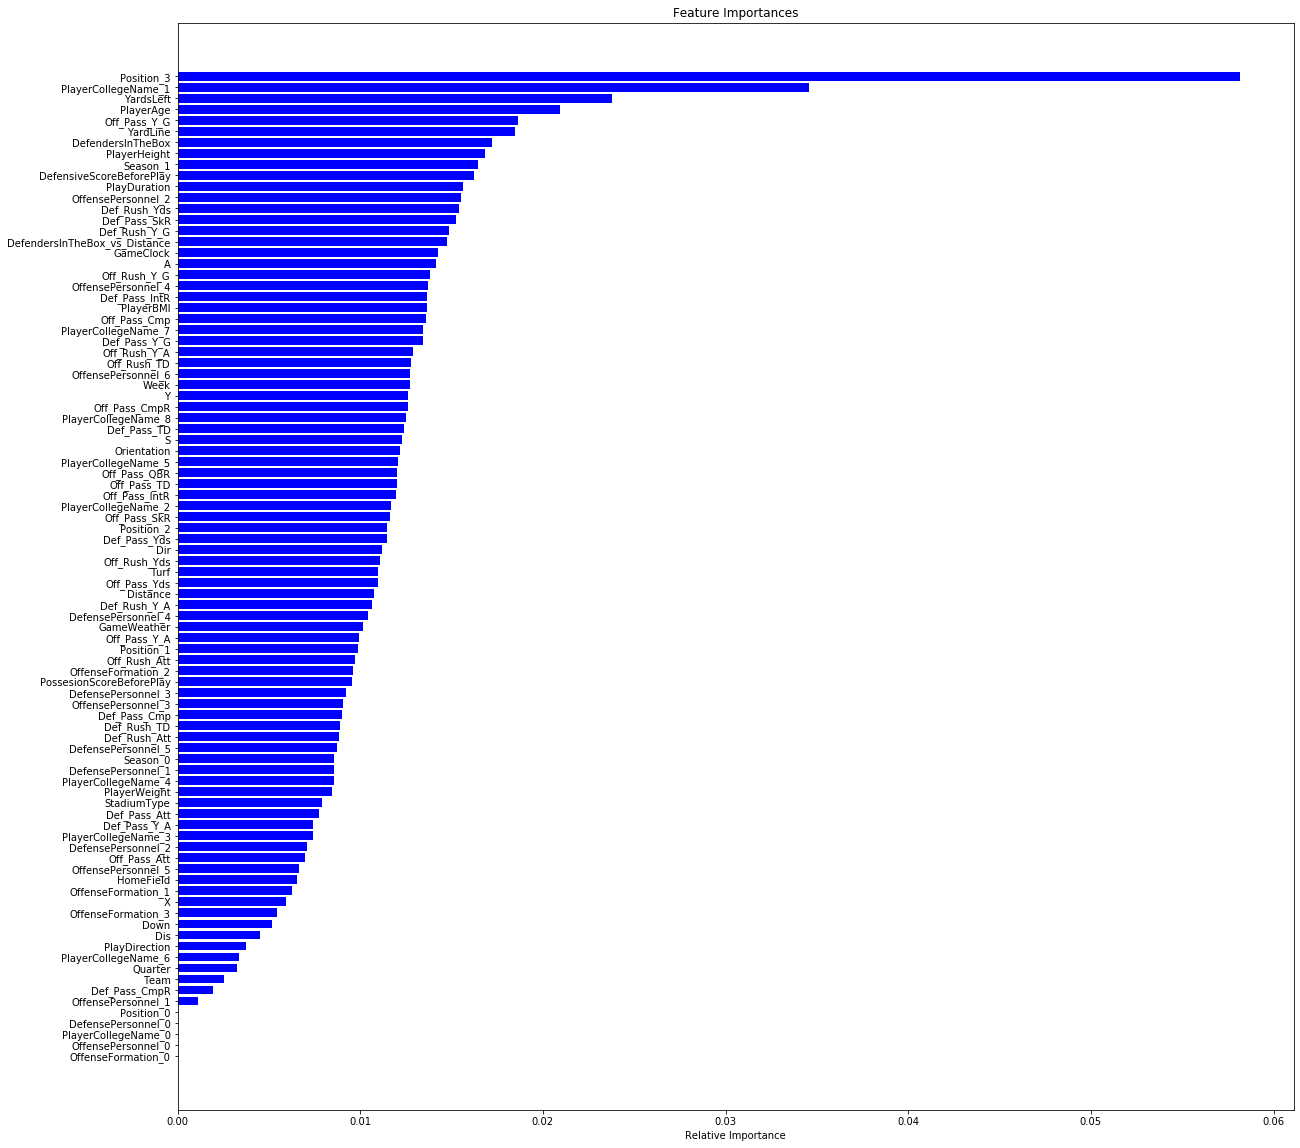

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
col = tree_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(20,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), col[indices])
plt.xlabel('Relative Importance')
plt.savefig('feature_importance.png')


## LightGBM

In [ ]:
!pip install lightgbm

In [38]:
import lightgbm as lgb
param = {'num_leaves':100, 'num_trees':5000, 'objective':'regression'}
param['metric'] = 'rmse'
num_round = 100
train_data = lgb.Dataset(data=tree_train_s,label=y_train)
test_data = lgb.Dataset(data=tree_test_s,label=y_test)
bst = lgb.train(param, train_data, num_round, valid_sets=[test_data],early_stopping_rounds=10)

[1]	valid_0's rmse: 5.52811
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 5.46044
[3]	valid_0's rmse: 5.39997
[4]	valid_0's rmse: 5.34528
[5]	valid_0's rmse: 5.29158
[6]	valid_0's rmse: 5.24693
[7]	valid_0's rmse: 5.20034
[8]	valid_0's rmse: 5.16273
[9]	valid_0's rmse: 5.12158
[10]	valid_0's rmse: 5.08243
[11]	valid_0's rmse: 5.0484
[12]	valid_0's rmse: 5.01485
[13]	valid_0's rmse: 4.98381
[14]	valid_0's rmse: 4.95433
[15]	valid_0's rmse: 4.92438
[16]	valid_0's rmse: 4.89329
[17]	valid_0's rmse: 4.86469
[18]	valid_0's rmse: 4.83759
[19]	valid_0's rmse: 4.80932
[20]	valid_0's rmse: 4.78587
[21]	valid_0's rmse: 4.7589
[22]	valid_0's rmse: 4.73582
[23]	valid_0's rmse: 4.71165
[24]	valid_0's rmse: 4.68698
[25]	valid_0's rmse: 4.66208
[26]	valid_0's rmse: 4.63833
[27]	valid_0's rmse: 4.61611
[28]	valid_0's rmse: 4.59371
[29]	valid_0's rmse: 4.57541
[30]	valid_0's rmse: 4.55377
[31]	valid_0's rmse: 4.53354
[32]	valid_0's rmse: 4.51677
[33]	valid_0's rmse: 4

[286]	valid_0's rmse: 3.07398
[287]	valid_0's rmse: 3.07296
[288]	valid_0's rmse: 3.0715
[289]	valid_0's rmse: 3.06955
[290]	valid_0's rmse: 3.06826
[291]	valid_0's rmse: 3.06671
[292]	valid_0's rmse: 3.0653
[293]	valid_0's rmse: 3.06346
[294]	valid_0's rmse: 3.06235
[295]	valid_0's rmse: 3.06116
[296]	valid_0's rmse: 3.06024
[297]	valid_0's rmse: 3.05934
[298]	valid_0's rmse: 3.05736
[299]	valid_0's rmse: 3.05644
[300]	valid_0's rmse: 3.05519
[301]	valid_0's rmse: 3.0533
[302]	valid_0's rmse: 3.05181
[303]	valid_0's rmse: 3.05
[304]	valid_0's rmse: 3.04879
[305]	valid_0's rmse: 3.04764
[306]	valid_0's rmse: 3.04658
[307]	valid_0's rmse: 3.04545
[308]	valid_0's rmse: 3.04484
[309]	valid_0's rmse: 3.04299
[310]	valid_0's rmse: 3.04145
[311]	valid_0's rmse: 3.03867
[312]	valid_0's rmse: 3.03681
[313]	valid_0's rmse: 3.03506
[314]	valid_0's rmse: 3.03412
[315]	valid_0's rmse: 3.03272
[316]	valid_0's rmse: 3.03058
[317]	valid_0's rmse: 3.02977
[318]	valid_0's rmse: 3.02901
[319]	valid_0's 

[572]	valid_0's rmse: 2.87427
[573]	valid_0's rmse: 2.87416
[574]	valid_0's rmse: 2.87412
[575]	valid_0's rmse: 2.87398
[576]	valid_0's rmse: 2.87385
[577]	valid_0's rmse: 2.8734
[578]	valid_0's rmse: 2.8732
[579]	valid_0's rmse: 2.87299
[580]	valid_0's rmse: 2.87275
[581]	valid_0's rmse: 2.87271
[582]	valid_0's rmse: 2.87217
[583]	valid_0's rmse: 2.87196
[584]	valid_0's rmse: 2.87176
[585]	valid_0's rmse: 2.87164
[586]	valid_0's rmse: 2.8715
[587]	valid_0's rmse: 2.87123
[588]	valid_0's rmse: 2.87095
[589]	valid_0's rmse: 2.87065
[590]	valid_0's rmse: 2.87041
[591]	valid_0's rmse: 2.87032
[592]	valid_0's rmse: 2.87028
[593]	valid_0's rmse: 2.87007
[594]	valid_0's rmse: 2.86984
[595]	valid_0's rmse: 2.8697
[596]	valid_0's rmse: 2.86958
[597]	valid_0's rmse: 2.86949
[598]	valid_0's rmse: 2.86924
[599]	valid_0's rmse: 2.86918
[600]	valid_0's rmse: 2.86915
[601]	valid_0's rmse: 2.86897
[602]	valid_0's rmse: 2.86879
[603]	valid_0's rmse: 2.86861
[604]	valid_0's rmse: 2.86827
[605]	valid_0'

[863]	valid_0's rmse: 2.84731
[864]	valid_0's rmse: 2.84728
[865]	valid_0's rmse: 2.84727
[866]	valid_0's rmse: 2.84727
[867]	valid_0's rmse: 2.84714
[868]	valid_0's rmse: 2.84713
[869]	valid_0's rmse: 2.84711
[870]	valid_0's rmse: 2.84708
[871]	valid_0's rmse: 2.84709
[872]	valid_0's rmse: 2.84707
[873]	valid_0's rmse: 2.84704
[874]	valid_0's rmse: 2.84704
[875]	valid_0's rmse: 2.84702
[876]	valid_0's rmse: 2.84699
[877]	valid_0's rmse: 2.84699
[878]	valid_0's rmse: 2.84699
[879]	valid_0's rmse: 2.84692
[880]	valid_0's rmse: 2.84688
[881]	valid_0's rmse: 2.84692
[882]	valid_0's rmse: 2.84692
[883]	valid_0's rmse: 2.84689
[884]	valid_0's rmse: 2.84697
[885]	valid_0's rmse: 2.84691
[886]	valid_0's rmse: 2.84689
[887]	valid_0's rmse: 2.84696
[888]	valid_0's rmse: 2.84699
[889]	valid_0's rmse: 2.84693
[890]	valid_0's rmse: 2.8469
Early stopping, best iteration is:
[880]	valid_0's rmse: 2.84688


In [52]:
prediction = bst.predict(tree_test_s, num_iteration=bst.best_iteration)
y_valid=y_test.values
print('MSE on the testing set:', np.mean(((y_valid-prediction))**2))
print('RMSE on the testing set:', np.sqrt(((y_valid-prediction)**2).mean()))
prediction = bst.predict(tree_train_s, num_iteration=bst.best_iteration)
print("Training Accuracy:",r2_score(y_train.values, prediction))
prediction = bst.predict(tree_test_s, num_iteration=bst.best_iteration)
y_valid=y_test.values
print("Testing Accuracy:",r2_score(y_valid, prediction))

MSE on the testing set: 8.104741912416175
RMSE on the testing set: 2.846882841357574
Training Accuracy: 0.9984922777011389
Testing Accuracy: 0.7417239908822711


# Neural Network

In [53]:
# default
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor()
clf.fit(tree_train_s, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [54]:
# default
from sklearn.metrics import r2_score
prediction_train=clf.predict(tree_train_s)
prediction_test=clf.predict(tree_test_s)
print('MSE on the training set:', np.mean(((y_train.values-prediction_train))**2))
print('RMSE on the training set:', np.sqrt(((y_train.values-prediction_train)**2).mean()))
print('MSE on the testing set:', np.mean(((y_test.values-prediction_test))**2))
print('RMSE on the testing set:', np.sqrt(((y_test.values-prediction_test)**2).mean()))
print(r2_score(prediction_train, y_train.values), r2_score(prediction_test,y_test.values))

MSE on the training set: 15.387151338086076
RMSE on the training set: 3.922645961348803
MSE on the testing set: 21.556315548869655
RMSE on the testing set: 4.642877938183348
-0.04261844805120174 -0.4513134683041513


Don't run the following GridSearchCV code as it takes a long time

In [ ]:
# from sklearn.model_selection import GridSearchCV
# parameters = {
#     'hidden_layer_sizes': ((100,100,),(150,150,),(200,200,)),
# }
# gs = GridSearchCV(estimator = MLPRegressor(), param_grid=parameters,cv=5,n_jobs=-1)
# gs.fit(tree_train_s, y_train)
# print(gs.best_score_)
# print(gs.best_params_)

In [71]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(hidden_layer_sizes = (200,200,200,), activation='relu', solver='sgd', learning_rate='constant')
clf.fit(tree_train_s, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(200, 200, 200), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='sgd', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [72]:
prediction_train=clf.predict(tree_train_s)
prediction_test=clf.predict(tree_test_s)
print('MSE on the training set:', np.mean(((y_train.values-prediction_train))**2))
print('RMSE on the training set:', np.sqrt(((y_train.values-prediction_train)**2).mean()))
print('MSE on the testing set:', np.mean(((y_test.values-prediction_test))**2))
print('RMSE on the testing set:', np.sqrt(((y_test.values-prediction_test)**2).mean()))
print("Training Accuracy:",clf.score(tree_train_s,y_train))
print("Testing Accuracy:",clf.score(tree_test_s,y_test))

MSE on the training set: 0.3369333299315074
RMSE on the training set: 0.5804595850974531
MSE on the testing set: 11.155505699456826
RMSE on the testing set: 3.3399858831223863
Training Accuracy: 0.9898351506458539
Testing Accuracy: 0.6445044736918899


In [ ]:
# tanh (100,100,)
# MSE on the training set: 0.3984328446664383
# RMSE on the training set: 0.6312153710631881
# MSE on the testing set: 16.51035877210475
# RMSE on the testing set: 4.063294078959182
# Training Accuracy: 0.9879797886288021
# Testing Accuracy: 0.4738599182006705

# relu,(100,100)
# MSE on the training set: 1.589346476946846
# RMSE on the training set: 1.2606928559117188
# MSE on the testing set: 16.97541286478358
# RMSE on the testing set: 4.1201229186498285
# Training Accuracy: 0.9520514414142649
# Testing Accuracy: 0.4590399132728211

# relu,(100,100),sgd
# MSE on the training set: 1.1622033282210125
# RMSE on the training set: 1.0780553456205355
# MSE on the testing set: 15.20878722210761
# RMSE on the testing set: 3.89984451255529
# Training Accuracy: 0.9649378060856864
# Testing Accuracy: 0.5153374518651843

# relu,(100,100),lbfgs
# MSE on the training set: 2.2373404358046454
# RMSE on the training set: 1.4957741927860118
# MSE on the testing set: 16.889602166408903
# RMSE on the testing set: 4.109696116066114
# Training Accuracy: 0.932502289136794
# Testing Accuracy: 0.461774466076022

# relu,(100,100),adam
# MSE on the training set: 1.746158669234184
# RMSE on the training set: 1.3214229713585972
# MSE on the testing set: 16.047721433555473
# RMSE on the testing set: 4.0059607378949025
# Training Accuracy: 0.9473206173315947
# Testing Accuracy: 0.488602907769074

# relu,(100,100),sgd,invscaling
# laji

# relur,(100,100),sgd,adaptive
# MSE on the training set: 1.3178960431513287
# RMSE on the training set: 1.1479965344683445
# MSE on the testing set: 15.79534331653171
# RMSE on the testing set: 3.974335581771085
# Training Accuracy: 0.9602407552088068
# Testing Accuracy: 0.4966455096875493

# relu,(100,100),sgd,constant
# MSE on the training set: 1.1421767263477085
# RMSE on the training set: 1.0687266845867134
# MSE on the testing set: 15.118965487660441
# RMSE on the testing set: 3.888311392836284
# Training Accuracy: 0.9655419831528792
# Testing Accuracy: 0.5181998254429916

# relu,(100,100),sgd,constant,iter 500

## Recommendation System Program

### Have to all the code in the data preposseing and data engineering part and the XGBoost model before running this code to launch the recommendation system program

In [73]:
import xgboost as xgb
model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, colsample_bytree = 0.45,\
                         max_depth = 50, n_estimators = 1000, min_child_weight = 0, n_jobs = -1)
model.fit(tree_train_s, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.45, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=50, min_child_weight=0, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [75]:
from tkinter import *
import tkinter as tk
import math

window = tk.Tk()
window.title('')
window.geometry('800x800')
window.configure(background='white')

# convert the abbreviation team name of the train file to the abbreviation team name used by the pro-football-reference website
def train_to_pro(abbr):    
    train_name_dict = {'ARZ': 'crd', 'ARI': 'crd', 'ATL': 'atl', 'BLT': 'rav', 'BAL': 'rav', 'BUF': 'buf', 'CAR': 'car', 'CHI': 'chi', 'CIN': 'cin', 'CLV': 'cle', 'CLE': 'cle', 'DAL': 'dal', 'DEN': 'den', 'DET': 'det', 'GB': 'gnb', 'HST': 'htx', 'HOU': 'htx', 'IND': 'clt', 'JAX': 'jax', 'KC': 'kan', 'LAC': 'sdg', 'LA': 'ram', 'MIA': 'mia', 'MIN': 'min', 'NE': 'nwe', 'NO': 'nor', 'NYG': 'nyg', 'NYJ': 'nyj', 'OAK': 'rai', 'PHI': 'phi', 'PIT': 'pit', 'SF': 'sfo', 'SEA': 'sea', 'TB': 'tam', 'TEN': 'oti', 'WAS': 'was'}
    return train_name_dict[abbr]

def calculate_best_formation():
    team = team_variable.get()
    team = 1 if 'Home' else 0
    yardline = float(yardline_entry.get())
    quarter = float(quarter_entry.get())
    gameclock = float(gameclock_entry.get())
    down = float(down_entry.get())
    distance = float(distance_entry.get())
    homescorebeforeplay = float(homescorebeforeplay_entry.get())
    visitorscorebeforeplay = float(visitorscorebeforeplay_entry.get())
    playerheight = float(playerheight_entry.get())
    playerweight = float(playerweight_entry.get())
    playerage = float(playerage_entry.get())
    homepossesion = homepossesion_variable.get()
    homepossesion = 1 if True else 0
    homefield = homefield_variable.get()
    homefield = 1 if True else 0
    offenseformation = offenseformation_variable.get()
    offensepersonnel = offensepersonnel_variable.get()
    playercollegename = playercollegename_variable.get()
    position = position_variable.get()
    hometeamabbr = train_to_pro(hometeamabbr_variable.get())
    visitorteamabbr = train_to_pro(visitorteamabbr_variable.get())
    
    team_pass_rank = pd.read_csv('2018pass.csv', index_col='TmAbbr')
    team_rush_rank = pd.read_csv('2018rush.csv', index_col='TmAbbr')
    team_passdef_rank = pd.read_csv('2018passdef.csv', index_col='TmAbbr')
    team_rushdef_rank = pd.read_csv('2018rushdef.csv', index_col='TmAbbr')
    if homepossesion == 1:
        pass_rank = team_pass_rank.loc[[hometeamabbr]]
        rush_rank = team_pass_rank.loc[[hometeamabbr]]
        passdef_rank = team_pass_rank.loc[[visitorteamabbr]]
        rushdef_rank = team_pass_rank.loc[[visitorteamabbr]]
    elif homepossesion == 0:
        pass_rank = team_pass_rank.loc[[visitorteamabbr]]
        rush_rank = team_pass_rank.loc[[visitorteamabbr]]
        passdef_rank = team_pass_rank.loc[[hometeamabbr]]
        rushdef_rank = team_pass_rank.loc[[hometeamabbr]]
        
    ditb_list = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0]
    dfp_list = ['{"DL": 2, "LB": 3, "DB": 6}', '{"DL": 4, "LB": 4, "DB": 3}',
                 '{"DL": 3, "LB": 2, "DB": 6}', '{"DL": 3, "LB": 4, "DB": 4}',
                 '{"DL": 3, "LB": 3, "DB": 5}', '{"DL": 4, "LB": 3, "DB": 4}',
                 '{"DL": 4, "LB": 1, "DB": 6}', '{"DL": 4, "LB": 2, "DB": 5}',
                 '{"DL": 5, "LB": 2, "DB": 4}', '{"DL": 2, "LB": 4, "DB": 5}',
                 '{"DL": 2, "LB": 5, "DB": 4}', '{"DL": 5, "LB": 4, "DB": 2}',
                 '{"DL": 1, "LB": 5, "DB": 5}', '{"DL": 5, "LB": 3, "DB": 3}',
                 '{"DL": 6, "LB": 2, "DB": 3}', '{"DL": 3, "LB": 5, "DB": 3}',
                 '{"DL": 6, "LB": 3, "DB": 2}', '{"DL": 1, "LB": 3, "DB": 7}',
                 '{"DL": 2, "LB": 2, "DB": 7}', '{"DL": 4, "LB": 5, "DB": 2}',
                 '{"DL": 1, "LB": 4, "DB": 6}', '{"DL": 5, "LB": 5, "DB": 1}',
                 '{"DL": 6, "LB": 1, "DB": 4}', '{"DL": 6, "LB": 4, "DB": 1}',
                 '{"DL": 5, "LB": 1, "DB": 5}', '{"DL": 4, "LB": 6, "DB": 1}',
                 '{"DL": 0, "LB": 5, "DB": 6}', '{"DL": 3, "LB": 1, "DB": 7}',
                 '{"DL": 4, "LB": 0, "DB": 7}', '{"DL": 0, "LB": 6, "DB": 5}',
                 '{"DL": 1, "LB": 2, "DB": 8}', '{"DL": 0, "LB": 4, "DB": 7}',
                 '{"DL": 7, "LB": 2, "DB": 2}']
    
    field_eq_possession = (homepossesion == homefield)
    playerbmi = 703*(playerweight/(playerheight)**2)
    yardsleft = 100-yardline if homefield else yardline
    
    features = ['Team', 'X', 'Y', 'S', 'A', 'Dis',
       'Orientation', 'Dir', 'Season',
       'YardLine', 'Quarter', 'GameClock', 'Down',
       'Distance', 'PossesionScoreBeforePlay',
       'DefensiveScoreBeforePlay', 'DefendersInTheBox',
       'PlayDirection', 'PlayerHeight',
       'PlayerWeight','Week','StadiumType',
       'Turf', 'GameWeather','DefendersInTheBox_vs_Distance',
       'HomeField', 'PlayerBMI',
       'OffenseFormation','OffensePersonnel','DefensePersonnel','PlayerCollegeName','Position',
       'PlayDuration', 'PlayerAge', 'YardsLeft','Off_Pass_Cmp',
       'Off_Pass_Att', 'Off_Pass_CmpR', 'Off_Pass_TD', 'Off_Pass_IntR',
       'Off_Pass_SkR', 'Off_Pass_Yds', 'Off_Pass_Y_G', 'Off_Pass_Y_A',
       'Off_Pass_QBR', 'Off_Rush_Att', 'Off_Rush_Yds', 'Off_Rush_Y_G',
       'Off_Rush_Y_A', 'Off_Rush_TD', 'Def_Pass_Cmp', 'Def_Pass_Att',
       'Def_Pass_CmpR', 'Def_Pass_TD', 'Def_Pass_IntR', 'Def_Pass_SkR',
       'Def_Pass_Yds', 'Def_Pass_Y_G', 'Def_Pass_Y_A', 'Def_Rush_Att',
       'Def_Rush_Yds', 'Def_Rush_Y_G', 'Def_Rush_Y_A', 'Def_Rush_TD', 'Yards']
    
    dictlist = []
    combinations = []
    for i in range(len(ditb_list)):
        for j in range(len(dfp_list)):
            combinations.append('Number of Defenders in the box: ' + str(ditb_list[i]) + ',     Defensive Personnel: ' + str(dfp_list[j]))
            dfibd = ditb_list[i]/distance
            data_dict = {'Team':team, 'X':41.25, 'Y':30.53, 'S':3.63, 'A':3.35, 'Dis':0.38, 'Orientation':198.02, 
                         'Dir':114.26, 'Season':2018, 'YardLine':yardline, 'Quarter':quarter, 'GameClock':gameclock, 
                         'Down':down, 'Distance':distance, 'HomeScoreBeforePlay':homescorebeforeplay, 
                         'VisitorScoreBeforePlay':visitorscorebeforeplay, 'DefendersInTheBox':ditb_list[i],
                         'PlayDirection':True, 'PlayerHeight':playerheight, 'PlayerWeight':playerweight,
                         'Week':8, 'Turf':True, 'GameWeather':2, 'DefendersInTheBox_vs_Distance':dfibd,
                         'HomePossesion':homepossesion, 'Field_eq_Possession':field_eq_possession, 'HomeField':homefield, 
                         'PlayerBMI':playerbmi, 'PlayDuration':1, 'PlayerAge':playerage, 'YardsLeft':yardsleft, 
                         'Off_Pass_Cmp':pass_rank['Cmp'][0], 'Off_Pass_Att':pass_rank['Att'][0], 'Off_Pass_CmpR':pass_rank['Cmp%'][0], 
                         'Off_Pass_TD':pass_rank['TD'][0], 'Off_Pass_IntR':pass_rank['Int%'][0], 'Off_Pass_SkR':pass_rank['Sk%'][0],
                         'Off_Pass_Yds':pass_rank['Yds'][0], 'Off_Pass_Y_G':pass_rank['Y/G'][0], 'Off_Pass_Y_A':pass_rank['Y/A'][0], 
                         'Off_Pass_QBR':pass_rank['Rate'][0], 'Off_Rush_Att':rush_rank['Att'][0], 'Off_Rush_Yds':rush_rank['Yds'][0], 
                         'Off_Rush_Y_G':rush_rank['Y/G'][0], 'Off_Rush_Y_A':rush_rank['Y/A'][0], 'Off_Rush_TD':rush_rank['TD'][0], 
                         'Def_Pass_Cmp':passdef_rank['Cmp'][0], 'Def_Pass_Att':passdef_rank['Att'][0], 'Def_Pass_CmpR':passdef_rank['Cmp%'][0],
                         'Def_Pass_TD':passdef_rank['TD'][0], 'Def_Pass_IntR':passdef_rank['Int%'][0], 'Def_Pass_SkR':passdef_rank['Sk%'][0], 
                         'Def_Pass_Yds':passdef_rank['Yds'][0], 'Def_Pass_Y_G':passdef_rank['Y/G'][0], 'Def_Pass_Y_A':passdef_rank['Y/A'][0], 
                         'Def_Rush_Att':rushdef_rank['Att'][0], 'Def_Rush_Yds':rushdef_rank['Yds'][0], 'Def_Rush_Y_G':rushdef_rank['Y/G'][0], 
                         'Def_Rush_Y_A':rushdef_rank['Y/A'][0], 'Def_Rush_TD':rushdef_rank['TD'][0], 'OffenseFormation':offenseformation,
                         'OffensePersonnel':offensepersonnel, 'DefensePersonnel':dfp_list[j], 'PlayerCollegeName':playercollegename,
                         'Position':position}
            dictlist.append(data_dict)
    data_df = pd.DataFrame(dictlist)
    data_df = pd.concat([data_df.iloc[:,:31], data_df.iloc[:,31:60].applymap(convert_rank), data_df.iloc[:,60:]], axis=1)
    data_df  = data_df.assign(PossesionScoreBeforePlay = lambda x: np.where(x['HomePossesion'] == True,\
                                                                 x['HomeScoreBeforePlay'],\
                                                                 x['VisitorScoreBeforePlay']))
    data_df  = data_df.assign(DefensiveScoreBeforePlay = lambda x: np.where(x['HomePossesion'] == False,\
                                                                     x['HomeScoreBeforePlay'],\
                                                                     x['VisitorScoreBeforePlay']))
    data_df = data_df.drop(columns=['HomePossesion', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay'])
    data_df = encoder.transform(data_df)
    data_df_s = scaler.transform(data_df)
    prediction = np.array(model.predict(data_df_s))
    sort_index = np.argsort(prediction)
    result_str = "\n"
    for r in range(5):
        result_str += ("Number " + str(r+1) + ": " +combinations[sort_index[r]] + "\n" + "\n")
    result_label.configure(text=result_str)

    
header_label = tk.Label(window, text='Defensive Play Recommendation System', bg="white")
header_label.config(font=("Forte", 25))
header_label.pack()

middle_label = tk.Label(window, bg="white")
middle_label.pack()

team_frame = tk.Frame(window)
team_frame.pack(side=tk.TOP)
team_label = tk.Label(team_frame, text='Team')
team_label.pack(side=tk.LEFT)
team_variable = StringVar(team_frame)
team_variable.set("Home")
team_entry = tk.OptionMenu(team_frame, team_variable, "Home", "Away")
team_entry.pack(side=tk.LEFT)

yardline_frame = tk.Frame(window)
yardline_frame.pack(side=tk.TOP)
yardline_label = tk.Label(yardline_frame, text='YardLine')
yardline_label.pack(side=tk.LEFT)
yardline_entry = tk.Entry(yardline_frame)
yardline_entry.pack(side=tk.LEFT)

quarter_frame = tk.Frame(window)
quarter_frame.pack(side=tk.TOP)
quarter_label = tk.Label(quarter_frame, text='Quarter')
quarter_label.pack(side=tk.LEFT)
quarter_entry = tk.Entry(quarter_frame)
quarter_entry.pack(side=tk.LEFT)

gameclock_frame = tk.Frame(window)
gameclock_frame.pack(side=tk.TOP)
gameclock_label = tk.Label(gameclock_frame, text='GameClock')
gameclock_label.pack(side=tk.LEFT)
gameclock_entry = tk.Entry(gameclock_frame)
gameclock_entry.pack(side=tk.LEFT)

down_frame = tk.Frame(window)
down_frame.pack(side=tk.TOP)
down_label = tk.Label(down_frame, text='Down')
down_label.pack(side=tk.LEFT)
down_entry = tk.Entry(down_frame)
down_entry.pack(side=tk.LEFT)

distance_frame = tk.Frame(window)
distance_frame.pack(side=tk.TOP)
distance_label = tk.Label(distance_frame, text='Distance')
distance_label.pack(side=tk.LEFT)
distance_entry = tk.Entry(distance_frame)
distance_entry.pack(side=tk.LEFT)

homescorebeforeplay_frame = tk.Frame(window)
homescorebeforeplay_frame.pack(side=tk.TOP)
homescorebeforeplay_label = tk.Label(homescorebeforeplay_frame, text='HomeScoreBeforePlay')
homescorebeforeplay_label.pack(side=tk.LEFT)
homescorebeforeplay_entry = tk.Entry(homescorebeforeplay_frame)
homescorebeforeplay_entry.pack(side=tk.LEFT)

visitorscorebeforeplay_frame = tk.Frame(window)
visitorscorebeforeplay_frame.pack(side=tk.TOP)
visitorscorebeforeplay_label = tk.Label(visitorscorebeforeplay_frame, text='VisitorScoreBeforePlay')
visitorscorebeforeplay_label.pack(side=tk.LEFT)
visitorscorebeforeplay_entry = tk.Entry(visitorscorebeforeplay_frame)
visitorscorebeforeplay_entry.pack(side=tk.LEFT)

playerheight_frame = tk.Frame(window)
playerheight_frame.pack(side=tk.TOP)
playerheight_label = tk.Label(playerheight_frame, text='PlayerHeight')
playerheight_label.pack(side=tk.LEFT)
playerheight_entry = tk.Entry(playerheight_frame)
playerheight_entry.pack(side=tk.LEFT)

playerweight_frame = tk.Frame(window)
playerweight_frame.pack(side=tk.TOP)
playerweight_label = tk.Label(playerweight_frame, text='PlayerWeight')
playerweight_label.pack(side=tk.LEFT)
playerweight_entry = tk.Entry(playerweight_frame)
playerweight_entry.pack(side=tk.LEFT)

playerage_frame = tk.Frame(window)
playerage_frame.pack(side=tk.TOP)
playerage_label = tk.Label(playerage_frame, text='PlayerAge')
playerage_label.pack(side=tk.LEFT)
playerage_entry = tk.Entry(playerage_frame)
playerage_entry.pack(side=tk.LEFT)

homepossesion_frame = tk.Frame(window)
homepossesion_frame.pack(side=tk.TOP)
homepossesion_label = tk.Label(homepossesion_frame, text='HomePossesion')
homepossesion_label.pack(side=tk.LEFT)
homepossesion_variable = StringVar(homepossesion_frame)
homepossesion_variable.set("True")
homepossesion_entry = tk.OptionMenu(homepossesion_frame, homepossesion_variable, "True", "False")
homepossesion_entry.pack(side=tk.LEFT)

homefield_frame = tk.Frame(window)
homefield_frame.pack(side=tk.TOP)
homefield_label = tk.Label(homefield_frame, text='HomeField')
homefield_label.pack(side=tk.LEFT)
homefield_variable = StringVar(homefield_frame)
homefield_variable.set("True")
homefield_entry = tk.OptionMenu(homefield_frame, homefield_variable, "True", "False")
homefield_entry.pack(side=tk.LEFT)

offenseformation_frame = tk.Frame(window)
offenseformation_frame.pack(side=tk.TOP)
offenseformation_label = tk.Label(offenseformation_frame, text='OffenseFormation')
offenseformation_label.pack(side=tk.LEFT)
offenseformation_variable = StringVar(offenseformation_frame)
offenseformation_variable.set("SHOTGUN")
offenseformation_entry = tk.OptionMenu(offenseformation_frame, offenseformation_variable, 'SHOTGUN', 'SINGLEBACK', 'JUMBO', 'PISTOL', 'I_FORM', 'ACE',
       'WILDCAT')
offenseformation_entry.pack(side=tk.LEFT)

offensepersonnel_frame = tk.Frame(window)
offensepersonnel_frame.pack(side=tk.TOP)
offensepersonnel_label = tk.Label(offensepersonnel_frame, text='OffensePersonnel')
offensepersonnel_label.pack(side=tk.LEFT)
offensepersonnel_variable = StringVar(offensepersonnel_frame)
offensepersonnel_variable.set('{"OL": 5, "QB": 1, "RB": 1, "TE": 1, "WR": 3}')
offensepersonnel_entry = tk.OptionMenu(offensepersonnel_frame, offensepersonnel_variable, '{"OL": 5, "QB": 1, "RB": 1, "TE": 1, "WR": 3}',
       '{"OL": 6, "QB": 1, "RB": 2, "TE": 2, "WR": 0}',
       '{"OL": 5, "QB": 1, "RB": 1, "TE": 3, "WR": 1}',
       '{"OL": 5, "QB": 1, "RB": 1, "TE": 2, "WR": 2}',
       '{"OL": 6, "QB": 1, "RB": 1, "TE": 2, "WR": 1}',
       '{"OL": 5, "QB": 1, "RB": 2, "TE": 1, "WR": 2}',
       '{"OL": 5, "QB": 1, "RB": 2, "TE": 2, "WR": 1}',
       '{"OL": 5, "QB": 1, "RB": 0, "TE": 3, "WR": 2}',
       '{"OL": 5, "QB": 1, "RB": 0, "TE": 1, "WR": 4}',
       '{"OL": 6, "QB": 1, "RB": 1, "TE": 0, "WR": 3}',
       '{"OL": 6, "QB": 1, "RB": 1, "TE": 1, "WR": 2}',
       '{"OL": 5, "QB": 1, "RB": 1, "TE": 2, "WR": 1}',
       '{"OL": 5, "QB": 1, "RB": 1, "TE": 3, "WR": 0}',
       '{"OL": 5, "QB": 1, "RB": 1, "TE": 0, "WR": 4}',
       '{"OL": 5, "QB": 1, "RB": 1, "TE": 1, "WR": 2}',
       '{"OL": 6, "QB": 1, "RB": 2, "TE": 0, "WR": 2}',
       '{"OL": 5, "QB": 1, "RB": 2, "TE": 0, "WR": 3}',
       '{"OL": 6, "QB": 1, "RB": 2, "TE": 1, "WR": 1}',
       '{"OL": 7, "QB": 1, "RB": 1, "TE": 0, "WR": 2}',
       '{"OL": 7, "QB": 1, "RB": 2, "TE": 0, "WR": 1}',
       '{"OL": 7, "QB": 1, "RB": 1, "TE": 2, "WR": 0}',
       '{"OL": 5, "QB": 1, "RB": 2, "TE": 3, "WR": 0}',
       '{"OL": 5, "QB": 1, "RB": 3, "TE": 1, "WR": 1}',
       '{"OL": 6, "QB": 1, "RB": 1, "TE": 3, "WR": 0}',
       '{"OL": 6, "QB": 1, "RB": 1, "TE": 2, "WR": 0}',
       '{"OL": 4, "QB": 1, "RB": 2, "TE": 3, "WR": 1}',
       '{"OL": 6, "QB": 1, "RB": 1, "TE": 1, "WR": 1}',
       '{"OL": 5, "QB": 1, "RB": 1, "TE": 4, "WR": 0}',
       '{"OL": 7, "QB": 1, "RB": 2, "TE": 1, "WR": 0}',
       '{"OL": 8, "QB": 1, "RB": 1, "TE": 0, "WR": 1}',
       '{"OL": 7, "QB": 1, "RB": 1, "TE": 1, "WR": 1}',
       '{"OL": 5, "QB": 1, "RB": 0, "TE": 0, "WR": 5}',
       '{"OL": 4, "QB": 1, "RB": 1, "TE": 2, "WR": 3}',
       '{"OL": 6, "QB": 1, "RB": 2, "TE": 1, "WR": 0}',
       '{"OL": 5, "QB": 2, "RB": 1, "TE": 1, "WR": 2}',
       '{"OL": 6, "QB": 1, "RB": 0, "TE": 2, "WR": 2}',
       '{"OL": 5, "QB": 1, "RB": 3, "TE": 0, "WR": 2}',
       '{"OL": 5, "QB": 2, "RB": 1, "TE": 2, "WR": 1}',
       '{"OL": 5, "QB": 2, "RB": 1, "TE": 0, "WR": 3}',
       '{"OL": 5, "QB": 1, "RB": 3, "TE": 2, "WR": 0}',
       '{"OL": 5, "QB": 1, "RB": 2, "TE": 2, "WR": 0}',
       '{"OL": 5, "QB": 1, "RB": 0, "TE": 2, "WR": 3}',
       '{"OL": 5, "QB": 2, "RB": 2, "TE": 2, "WR": 0}',
       '{"OL": 5, "QB": 2, "RB": 2, "TE": 0, "WR": 2}',
       '{"OL": 5, "QB": 2, "RB": 3, "TE": 1, "WR": 0}',
       '{"OL": 5, "QB": 2, "RB": 1, "TE": 3, "WR": 0}',
       '{"OL": 5, "QB": 2, "RB": 2, "TE": 1, "WR": 1}',
       '{"OL": 6, "QB": 1, "RB": 3, "TE": 0, "WR": 1}',
       '{"OL": 6, "QB": 1, "RB": 1, "TE": 1, "WR": 0}')
offensepersonnel_entry.pack(side=tk.LEFT)


playercollegename_frame = tk.Frame(window)
playercollegename_frame.pack(side=tk.TOP)
playercollegename_label = tk.Label(playercollegename_frame, text='PlayerCollegeName')
playercollegename_label.pack(side=tk.LEFT)
playercollegename_variable = StringVar(playercollegename_frame)
playercollegename_variable.set("Wisconsin")
playercollegename_entry = tk.OptionMenu(playercollegename_frame, playercollegename_variable, 'Wisconsin', 'Florida', 'Toledo', 'Nebraska', 'Monmouth (N.J.)',
       'West Alabama', 'Oregon', 'Pittsburgh', 'Abilene Christian',
       'Coastal Carolina', 'Louisville', 'Tulane', 'Florida State',
       'Indiana', 'North Carolina A&T', 'Rutgers', 'LSU', 'Towson', 'USC',
       'Chadron State', 'Oklahoma', 'North Carolina', 'Wake Forest',
       'Alabama State', 'North Carolina State', 'Michigan State',
       'Northern Iowa', 'Notre Dame', 'Washington', 'Utah State',
       'Pittsburg State', 'Louisiana State', 'Miami (Fla.)',
       'San Jose State', 'Tiffin University', 'Texas', 'California',
       'Tennessee', 'Alabama', 'Texas Tech', 'Southern Mississippi',
       'West Virginia', 'Kansas State', 'Georgia', 'Miami',
       'South Florida', 'Stanford', 'Brigham Young', 'Oklahoma State',
       'Ohio State', 'Georgia Southern', 'Harvard', 'UCLA',
       'Florida Atlantic', 'Shippensburg', 'Central Florida', 'Maryland',
       'Buffalo', 'Arkansas', 'Minnesota', 'East Carolina', 'Clemson',
       'Western Kentucky', 'Auburn', 'Central Missouri', 'Georgia State',
       'Oregon State', 'Augustana, S.D.', 'Azusa Pacific', 'Boise State',
       'Louisiana-Lafayette', 'Central Michigan', 'Kentucky', 'Purdue',
       'Mississippi', 'Northern Illinois', 'South Dakota',
       'Sam Houston State', 'Texas-El Paso', 'Middle Tennessee State',
       'South Carolina', 'Idaho', 'Western State, Colo.', 'Utah',
       'North Texas', 'Arkansas State', 'Nevada', 'Alabama-Birmingham',
       'Southern California', 'Washington State', 'Minn. State-Mankato',
       'Appalachian State', 'Duke', 'Illinois', 'Cincinnati',
       'Mississippi State', 'North Dakota State', 'Temple',
       'Southern Methodist', 'South Alabama', 'Fresno State', 'San Diego',
       'Grambling', 'Idaho State', 'Holy Cross', 'Boston College',
       'Baylor', 'Arizona', 'Grambling State', 'Missouri',
       'Arizona State', 'Wyoming', 'Iowa', 'Akron', 'Colorado State',
       'Texas Christian', 'Michigan', 'Eastern Michigan', 'Kent State',
       'Connecticut', 'Louisiana Tech', 'Texas A&M', 'Penn State',
       'Fordham', 'West Georgia', 'Colorado', 'San Diego State',
       'Citadel', 'Virginia State', 'Eastern Washington',
       'Western Carolina', 'Eastern Illinois', 'Massachusetts',
       'Western Oregon', 'Jacksonville State', 'Alcorn State',
       'Northwestern', 'Old Dominion', 'East Central', 'Ball State',
       'Western Michigan', 'Virginia', 'Brown', 'Memphis', 'Regina, Can.',
       'Sacramento State', 'Georgia Tech', 'Houston')
playercollegename_entry.pack(side=tk.LEFT)

position_frame = tk.Frame(window)
position_frame.pack(side=tk.TOP)
position_label = tk.Label(position_frame, text='Position')
position_label.pack(side=tk.LEFT)
position_variable = StringVar(position_frame)
position_variable.set("RB")
position_entry = tk.OptionMenu(position_frame, position_variable, 'RB', 'WR', 'FB', 'HB', 'QB', 'TE', 'CB', 'DT', 'DE')
position_entry.pack(side=tk.LEFT)

hometeamabbr_frame = tk.Frame(window)
hometeamabbr_frame.pack(side=tk.TOP)
hometeamabbr_label = tk.Label(hometeamabbr_frame, text='HomeTeamAbbr')
hometeamabbr_label.pack(side=tk.LEFT)
hometeamabbr_variable = StringVar(hometeamabbr_frame)
hometeamabbr_variable.set("NE")
hometeamabbr_entry = tk.OptionMenu(hometeamabbr_frame, hometeamabbr_variable, 'KC', 'NYJ', 'ATL', 'BLT', 'PIT', 
      'ARZ', 'JAX', 'OAK', 'PHI','IND', 'SEA', 'CAR', 'NYG', 'NO', 'LAC', 'HST', 'CLV', 'BUF',
       'TEN', 'NE', 'MIN', 'CHI', 'MIA', 'DAL', 'WAS', 'SF', 'GB', 'DET',
       'LA', 'DEN', 'TB', 'CIN')
hometeamabbr_entry.pack(side=tk.LEFT)

visitorteamabbr_frame = tk.Frame(window)
visitorteamabbr_frame.pack(side=tk.TOP)
visitorteamabbr_label = tk.Label(visitorteamabbr_frame, text='VisitorTeamAbbr')
visitorteamabbr_label.pack(side=tk.LEFT)
visitorteamabbr_variable = StringVar(visitorteamabbr_frame)
visitorteamabbr_variable.set("KC")
visitorteamabbr_entry = tk.OptionMenu(visitorteamabbr_frame, visitorteamabbr_variable, 'KC', 'NYJ', 'ATL', 'BLT', 'PIT', 
      'ARZ', 'JAX', 'OAK', 'PHI','IND', 'SEA', 'CAR', 'NYG', 'NO', 'LAC', 'HST', 'CLV', 'BUF',
       'TEN', 'NE', 'MIN', 'CHI', 'MIA', 'DAL', 'WAS', 'SF', 'GB', 'DET',
       'LA', 'DEN', 'TB', 'CIN')
visitorteamabbr_entry.pack(side=tk.LEFT)

calculate_btn = tk.Button(window, text='Calculate', command=calculate_best_formation)
calculate_btn.pack()

result_label = tk.Label(window, bg="white")
result_label.pack()

window.mainloop()